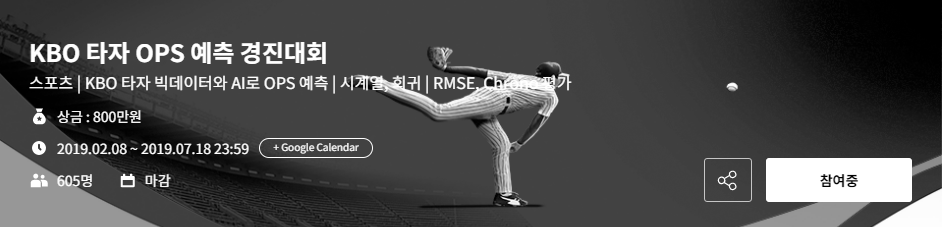
https://dacon.io/competitions/official/62540/data

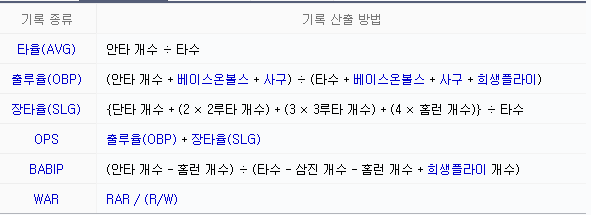

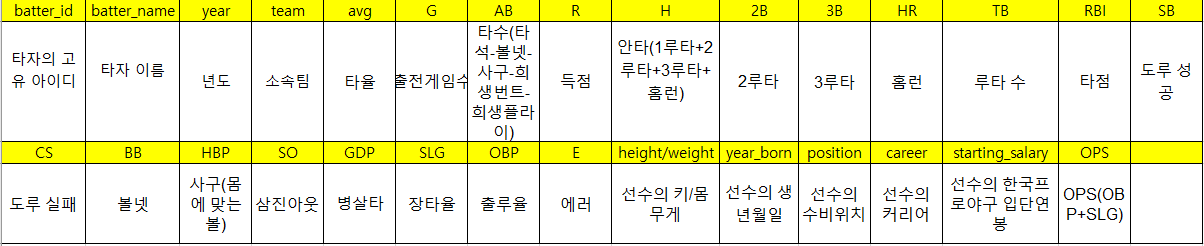

In [1]:
# 한글폰트 설치
!apt-get update -qq
!apt-get install fonts-nanum* -qq

Selecting previously unselected package fonts-nanum.
(Reading database ... 160837 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-6_all.deb ...
Unpacking fonts-nanum-eco (1.000-6) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20170925-1_all.deb ...
Unpacking fonts-nanum-extra (20170925-1) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-1_all.deb ...
Unpacking fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-extra (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Setting up fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-eco (1.000-6) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...


In [2]:
import matplotlib.font_manager as fm

fm._rebuild()

### 런타임 재시작
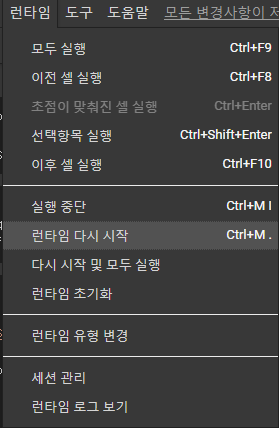

In [1]:
# 런타임 다시 시작 후 다시 실행
import numpy as np
import matplotlib as mpl  # 기본 설정 만지는 용도
import matplotlib.pyplot as plt
import scipy.stats
import matplotlib.font_manager as fm

fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'

font = fm.FontProperties(fname=fontpath, size=9)

fm._rebuild()

# 그래프에 retina display 적용

%config InlineBackend.figure_format = 'retina'

# Colab 의 한글 폰트 설정

plt.rc('font', family='NanumBarunGothic') 
mpl.rcParams['axes.unicode_minus'] = False

In [2]:
# 필요 라이브러리 추가 로드
import seaborn as sns
import pandas as pd

# 1. KBO 타자 OPS 예측
## 1.2. 탐색적 데이터 분석

### 1.2.1. 프리시즌 데이터 분석

In [3]:
from google.colab import files
uploaded=files.upload()

Saving dataset.zip to dataset.zip


In [4]:
import os
import zipfile

In [5]:
local_zip = '/content/dataset.zip'

zip_ref = zipfile.ZipFile(local_zip, 'r')

zip_ref.extractall('/content')
zip_ref.close()

In [327]:
# 프리시즌 데이터 로드
preseason_df = pd.read_csv("/content/Pre_Season_Batter.csv")
# 정규시즌 데이터 로드
regular_season_df = pd.read_csv("/content/Regular_Season_Batter.csv")
# 데이터 크기 확인
print(preseason_df.shape)
# 데이터 상단 출력
display(preseason_df.head())

(1393, 29)


,batter_id,batter_name,year,team,avg,G,AB,R,H,2B,3B,HR,TB,RBI,SB,CS,BB,HBP,SO,GDP,SLG,OBP,E,height/weight,year_born,position,career,starting_salary,OPS
0,0,가르시아,2018,LG,0.350,7,20,1,7,1,0,1,11,5,0,0,2,0,3,1,0.550,0.409,1,177cm/93kg,1985년 04월 12일,내야수(우투우타),쿠바 Ciego de Avila Maximo Gomez Baez(대),NaN,0.959
1,1,강경학,2011,한화,0.000,4,2,2,0,0,0,0,0,1,0,1,0,2,1,0,0.000,0.500,0,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.500
2,1,강경학,2014,한화,-,4,0,2,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,0,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,NaN
3,1,강경학,2015,한화,0.130,10,23,3,3,0,0,0,3,1,3,0,4,1,9,0,0.130,0.286,2,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.416
4,1,강경학,2016,한화,0.188,14,32,4,6,1,1,0,9,2,1,2,0,1,10,0,0.281,0.212,0,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.493


In [328]:
# 데이터 기초통계량 확인
display(preseason_df.describe())

,batter_id,year,G,AB,R,H,2B,3B,HR,TB,RBI,SB,CS,BB,HBP,SO,GDP,SLG,OBP,E,OPS
count,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,1364.000000,1368.000000,1393.000000,1364.000000
mean,173.434314,2013.014358,8.705671,19.201723,2.679828,5.021536,0.954774,0.119885,0.391960,7.391960,2.430725,0.629576,0.291457,1.877961,0.330223,3.714286,0.447236,0.361012,0.317912,0.381910,0.676924
std,94.716851,4.166757,5.562686,13.395946,2.637212,4.232584,1.196904,0.379976,0.748557,6.538787,2.698122,1.146854,0.595522,2.053392,0.642204,3.180884,0.723364,0.269892,0.151489,0.729521,0.386933
min,0.000000,2002.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,99.000000,2010.000000,6.000000,9.000000,1.000000,2.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.217000,0.250000,0.000000,0.472000
50%,178.000000,2014.000000,9.000000,18.000000,2.000000,4.000000,1.000000,0.000000,0.000000,6.000000,2.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000,0.344500,0.333000,0.000000,0.675000
75%,254.000000,2017.000000,11.000000,28.000000,4.000000,8.000000,2.000000,0.000000,1.000000,11.000000,4.000000,1.000000,0.000000,3.000000,1.000000,5.000000,1.000000,0.478000,0.400000,1.000000,0.867000
max,344.000000,2018.000000,119.000000,183.000000,35.000000,51.000000,11.000000,4.000000,5.000000,68.000000,24.000000,9.000000,4.000000,21.000000,4.000000,36.000000,5.000000,4.000000,1.000000,5.000000,5.000000


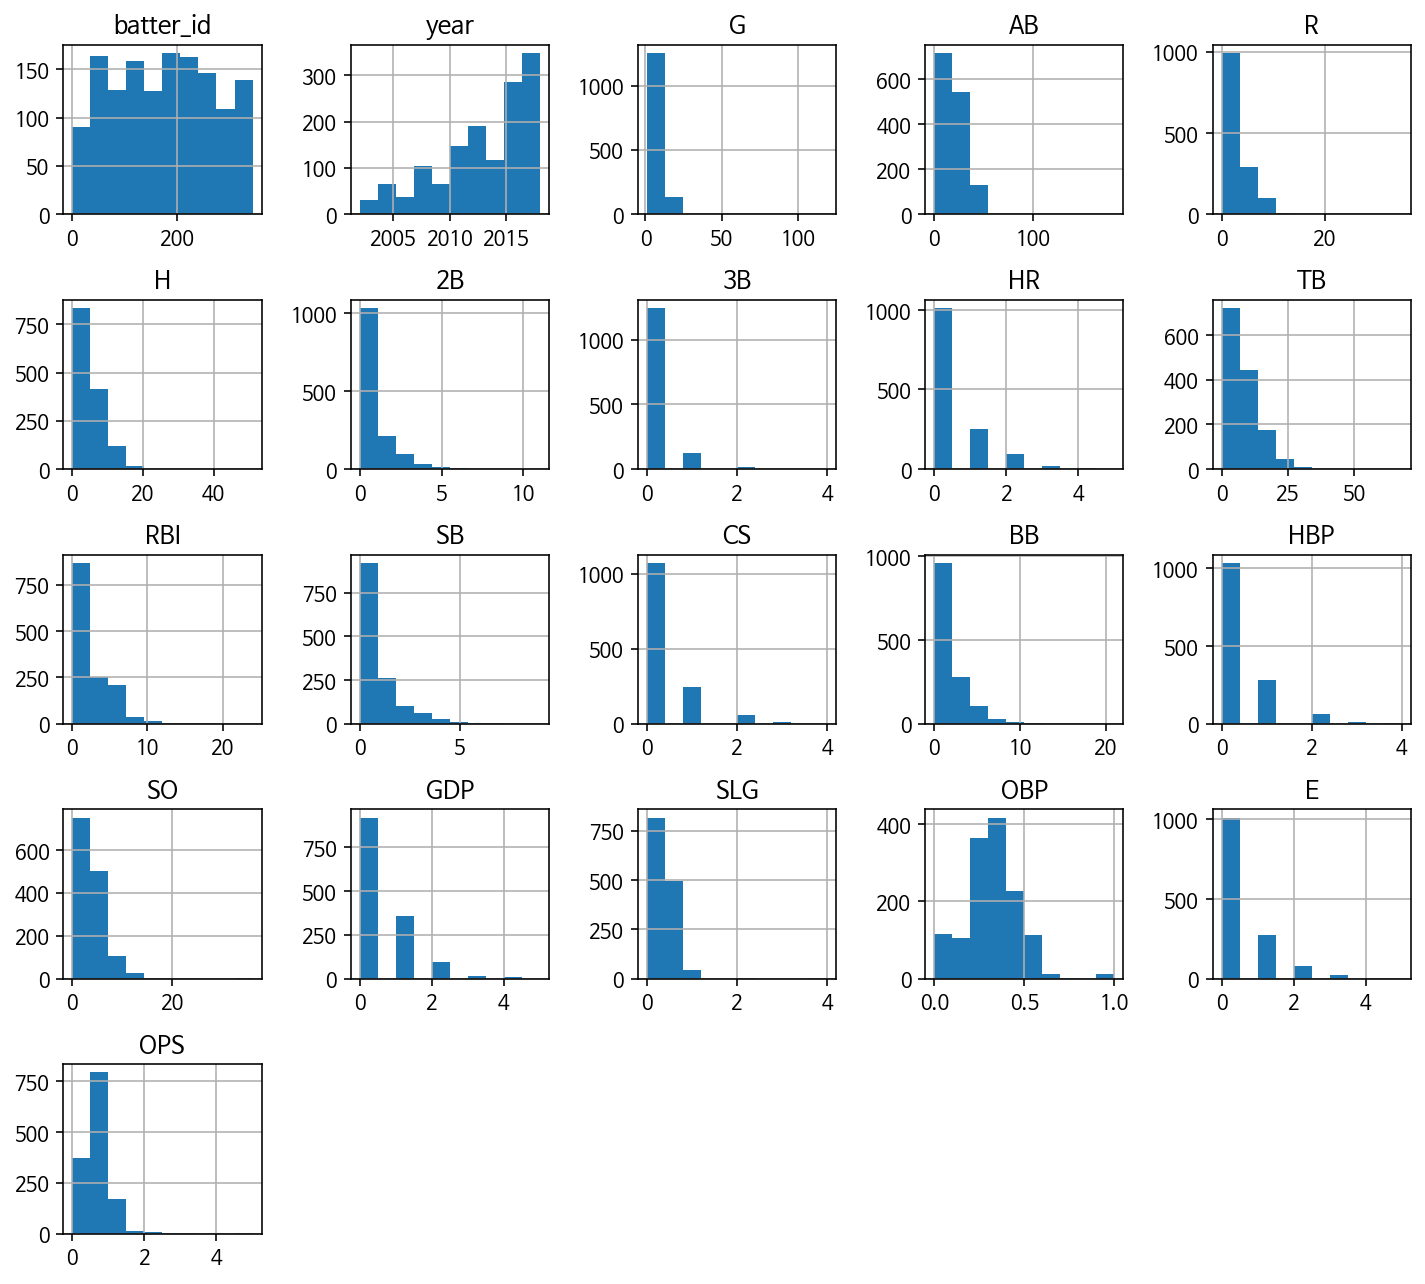

In [329]:
# 데이터 시각화
preseason_df.hist(figsize=(10,9))
plt.tight_layout() # 그래프 간격 설정
plt.show()

In [330]:
# 정규시즌 데이터에서 2002년 이후의 연도별 기록된 선수의 수
regular_count = regular_season_df.groupby('year')['batter_id'].count().rename('regular')
# 프리시즌 데이터에서 연도별 기록된 선수의 수
preseason_count = preseason_df.groupby('year')['batter_id'].count().rename('preseason')
pd.concat([regular_count,preseason_count, np.round(preseason_count/regular_count,2).rename(
        'ratio')], axis = 1).transpose().loc[:,2002:] # 2002년부터 봅니다.

year,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
regular,43.00,54.00,68.00,73.00,85.00,98.00,115.00,124.00,130.00,151.0,174.0,194.00,186.00,207.00,213.00,217.00,227.0
preseason,12.00,19.00,28.00,37.00,36.00,43.00,61.00,66.00,72.00,75.0,87.0,104.00,117.00,134.00,153.00,167.00,182.0
ratio,0.28,0.35,0.41,0.51,0.42,0.44,0.53,0.53,0.55,0.5,0.5,0.54,0.63,0.65,0.72,0.77,0.8


In [331]:
# 타자의 이름과 연도를 이용해 새로운 인덱스를 생성
regular_season_df['new_idx'] = regular_season_df['batter_name'] + regular_season_df['year'].apply(str)
preseason_df['new_idx'] = preseason_df['batter_name'] + preseason_df['year'].apply(str)
print(regular_season_df.head())
print(preseason_df.head())

   batter_id batter_name  year  ... starting_salary    OPS   new_idx
0          0        가르시아  2018  ...             NaN  0.902  가르시아2018
1          1         강경학  2011  ...         10000만원  0.000   강경학2011
2          1         강경학  2014  ...         10000만원  0.686   강경학2014
3          1         강경학  2015  ...         10000만원  0.673   강경학2015
4          1         강경학  2016  ...         10000만원  0.489   강경학2016

[5 rows x 30 columns]
   batter_id batter_name  year  ... starting_salary    OPS   new_idx
0          0        가르시아  2018  ...             NaN  0.959  가르시아2018
1          1         강경학  2011  ...         10000만원  0.500   강경학2011
2          1         강경학  2014  ...         10000만원    NaN   강경학2014
3          1         강경학  2015  ...         10000만원  0.416   강경학2015
4          1         강경학  2016  ...         10000만원  0.493   강경학2016

[5 rows x 30 columns]


In [332]:
# 새로운 인덱스의 교집합
intersection_idx = list(set(regular_season_df['new_idx']).intersection(preseason_df['new_idx']))
intersection_idx

['박한이2018',
 '김태진2016',
 '이영욱2017',
 '문규현2014',
 '허도환2013',
 '김태균2005',
 '강승호2016',
 '정의윤2006',
 '전준우2009',
 '김민식2015',
 '나원탁2018',
 '이해창2017',
 '배영섭2018',
 '이대형2006',
 '서동욱2016',
 '최정2015',
 '손아섭2008',
 '이용규2011',
 '박석민2017',
 '박용택2015',
 '조홍석2015',
 '박동원2015',
 '이대수2008',
 '남태혁2016',
 '김민하2015',
 '정수빈2009',
 '이정후2017',
 '김상수2018',
 '이대수2010',
 '서동욱2010',
 '조동찬2013',
 '오재일2018',
 '이용규2007',
 '손시헌2017',
 '이재원2008',
 '이영욱2009',
 '장민석2015',
 '박한이2013',
 '최정2009',
 '홍성갑2017',
 '박기혁2008',
 '김민성2018',
 '유재신2009',
 '이원석2017',
 '김주형2017',
 '김태균2013',
 '이용규2012',
 '이대형2010',
 '이해창2011',
 '김재환2016',
 '이대수2011',
 '박경수2009',
 '오태곤2016',
 '박헌도2013',
 '백상원2013',
 '박한이2014',
 '권정웅2017',
 '김강민2013',
 '정근우2010',
 '문선재2014',
 '김재호2009',
 '최진행2012',
 '황윤호2016',
 '손시헌2005',
 '조평호2016',
 '정진호2015',
 '이성곤2017',
 '김태균2004',
 '손주인2018',
 '박세혁2013',
 '윤진호2011',
 '최준석2009',
 '이지영2014',
 '정근우2008',
 '채은성2015',
 '노수광2017',
 '김재호2012',
 '강민호2016',
 '김선빈2013',
 '이영욱2016',
 '정근우2007',
 '최정민2015',
 '김동엽2018',
 '김문호2

In [333]:
# 교집합에 존재하는 데이터만 불러오기
regular_season_new = regular_season_df.loc[regular_season_df['new_idx'].apply(lambda x: x in intersection_idx)].copy()
regular_season_new = regular_season_new.sort_values(by = 'new_idx').reset_index(drop=True) 
regular_season_new.head()

,batter_id,batter_name,year,team,avg,G,AB,R,H,2B,3B,HR,TB,RBI,SB,CS,BB,HBP,SO,GDP,SLG,OBP,E,height/weight,year_born,position,career,starting_salary,OPS,new_idx
0,0,가르시아,2018,LG,0.339,50,183,27,62,9,0,8,95,34,5,0,9,8,25,3,0.519,0.383,9,177cm/93kg,1985년 04월 12일,내야수(우투우타),쿠바 Ciego de Avila Maximo Gomez Baez(대),NaN,0.902,가르시아2018
1,1,강경학,2011,한화,0.000,2,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0.000,0.000,1,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.000,강경학2011
2,1,강경학,2014,한화,0.221,41,86,11,19,2,3,1,30,7,0,0,13,2,28,1,0.349,0.337,6,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.686,강경학2014
3,1,강경학,2015,한화,0.257,120,311,50,80,7,4,2,101,27,4,3,40,5,58,3,0.325,0.348,15,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.673,강경학2015
4,1,강경학,2016,한화,0.158,46,101,16,16,3,2,1,26,7,0,0,8,2,30,5,0.257,0.232,7,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.489,강경학2016


In [334]:
# 비교를 위해 인덱스로 정렬
preseason_new = preseason_df.loc[preseason_df['new_idx'].apply(lambda x: x in intersection_idx)].copy()
preseason_new = preseason_new.sort_values(by = 'new_idx').reset_index(drop=True)

preseason_new.head()

,batter_id,batter_name,year,team,avg,G,AB,R,H,2B,3B,HR,TB,RBI,SB,CS,BB,HBP,SO,GDP,SLG,OBP,E,height/weight,year_born,position,career,starting_salary,OPS,new_idx
0,0,가르시아,2018,LG,0.350,7,20,1,7,1,0,1,11,5,0,0,2,0,3,1,0.550,0.409,1,177cm/93kg,1985년 04월 12일,내야수(우투우타),쿠바 Ciego de Avila Maximo Gomez Baez(대),NaN,0.959,가르시아2018
1,1,강경학,2011,한화,0.000,4,2,2,0,0,0,0,0,1,0,1,0,2,1,0,0.000,0.500,0,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.500,강경학2011
2,1,강경학,2014,한화,-,4,0,2,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,0,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,NaN,강경학2014
3,1,강경학,2015,한화,0.130,10,23,3,3,0,0,0,3,1,3,0,4,1,9,0,0.130,0.286,2,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.416,강경학2015
4,1,강경학,2016,한화,0.188,14,32,4,6,1,1,0,9,2,1,2,0,1,10,0,0.281,0.212,0,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.493,강경학2016


In [335]:
# 검정 코드
print(regular_season_new.shape, preseason_new.shape)
sum(regular_season_new['new_idx'] == preseason_new['new_idx'])

(1358, 30) (1358, 30)


1358

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


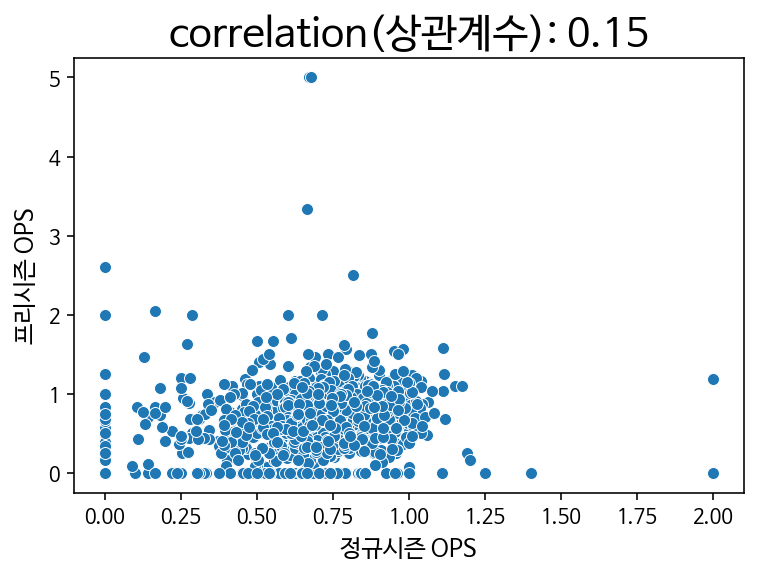

In [336]:
# 정규시즌과 프리시즌의 상관관계 계산
correlation = regular_season_new['OPS'].corr(preseason_new['OPS'])
sns.scatterplot(regular_season_new['OPS'], preseason_new['OPS'])
plt.title('correlation(상관계수): '+str(np.round(correlation,2)), fontsize=20)
plt.xlabel("정규시즌 OPS",fontsize=12)
plt.ylabel("프리시즌 OPS",fontsize=12)
plt.show()

### 1.2.2. 정규시즌 데이터 분석

In [337]:
regular_season_df = pd.read_csv("/content/Regular_Season_Batter.csv")
display(regular_season_df.shape, regular_season_df.head(),regular_season_df.describe())

(2454, 29)

,batter_id,batter_name,year,team,avg,G,AB,R,H,2B,3B,HR,TB,RBI,SB,CS,BB,HBP,SO,GDP,SLG,OBP,E,height/weight,year_born,position,career,starting_salary,OPS
0,0,가르시아,2018,LG,0.339,50,183,27,62,9,0,8,95,34,5,0,9,8,25,3,0.519,0.383,9,177cm/93kg,1985년 04월 12일,내야수(우투우타),쿠바 Ciego de Avila Maximo Gomez Baez(대),NaN,0.902
1,1,강경학,2011,한화,0.000,2,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0.000,0.000,1,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.000
2,1,강경학,2014,한화,0.221,41,86,11,19,2,3,1,30,7,0,0,13,2,28,1,0.349,0.337,6,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.686
3,1,강경학,2015,한화,0.257,120,311,50,80,7,4,2,101,27,4,3,40,5,58,3,0.325,0.348,15,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.673
4,1,강경학,2016,한화,0.158,46,101,16,16,3,2,1,26,7,0,0,8,2,30,5,0.257,0.232,7,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.489


,batter_id,year,avg,G,AB,R,H,2B,3B,HR,TB,RBI,SB,CS,BB,HBP,SO,GDP,SLG,OBP,E,OPS
count,2454.000000,2454.000000,2428.000000,2454.000000,2454.000000,2454.000000,2454.000000,2454.000000,2454.000000,2454.000000,2454.000000,2454.000000,2454.000000,2454.000000,2454.000000,2454.000000,2454.000000,2454.000000,2428.000000,2430.000000,2454.000000,2428.000000
mean,178.079462,2011.614507,0.237559,72.535045,201.514670,29.912388,55.988183,9.863488,0.957620,5.504075,84.279136,27.788509,5.290139,2.335778,20.943765,3.424613,38.596985,4.603504,0.343826,0.306684,3.676447,0.649939
std,97.557947,4.992833,0.098440,45.093871,169.537029,28.778759,52.253844,9.871314,1.647193,7.989380,82.854200,29.602966,9.088580,3.194045,21.206113,4.132614,31.801466,4.713531,0.163335,0.111778,4.585248,0.261634
min,0.000000,1993.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,101.250000,2008.000000,0.203000,28.000000,38.250000,5.000000,8.000000,1.000000,0.000000,0.000000,10.000000,3.000000,0.000000,0.000000,3.000000,0.000000,10.000000,1.000000,0.267454,0.272727,0.000000,0.546000
50%,183.000000,2013.000000,0.255000,79.000000,163.000000,21.000000,40.000000,7.000000,0.000000,2.000000,56.000000,17.000000,2.000000,1.000000,14.000000,2.000000,33.000000,3.000000,0.360124,0.328592,2.000000,0.688637
75%,265.000000,2016.000000,0.291000,115.000000,357.500000,49.000000,100.000000,16.000000,1.000000,8.000000,146.000000,44.000000,6.000000,3.000000,34.000000,5.000000,60.000000,7.000000,0.436000,0.367000,5.000000,0.797234
max,344.000000,2018.000000,1.000000,144.000000,600.000000,135.000000,201.000000,47.000000,17.000000,53.000000,377.000000,146.000000,84.000000,21.000000,108.000000,27.000000,161.000000,24.000000,3.000000,1.000000,30.000000,4.000000


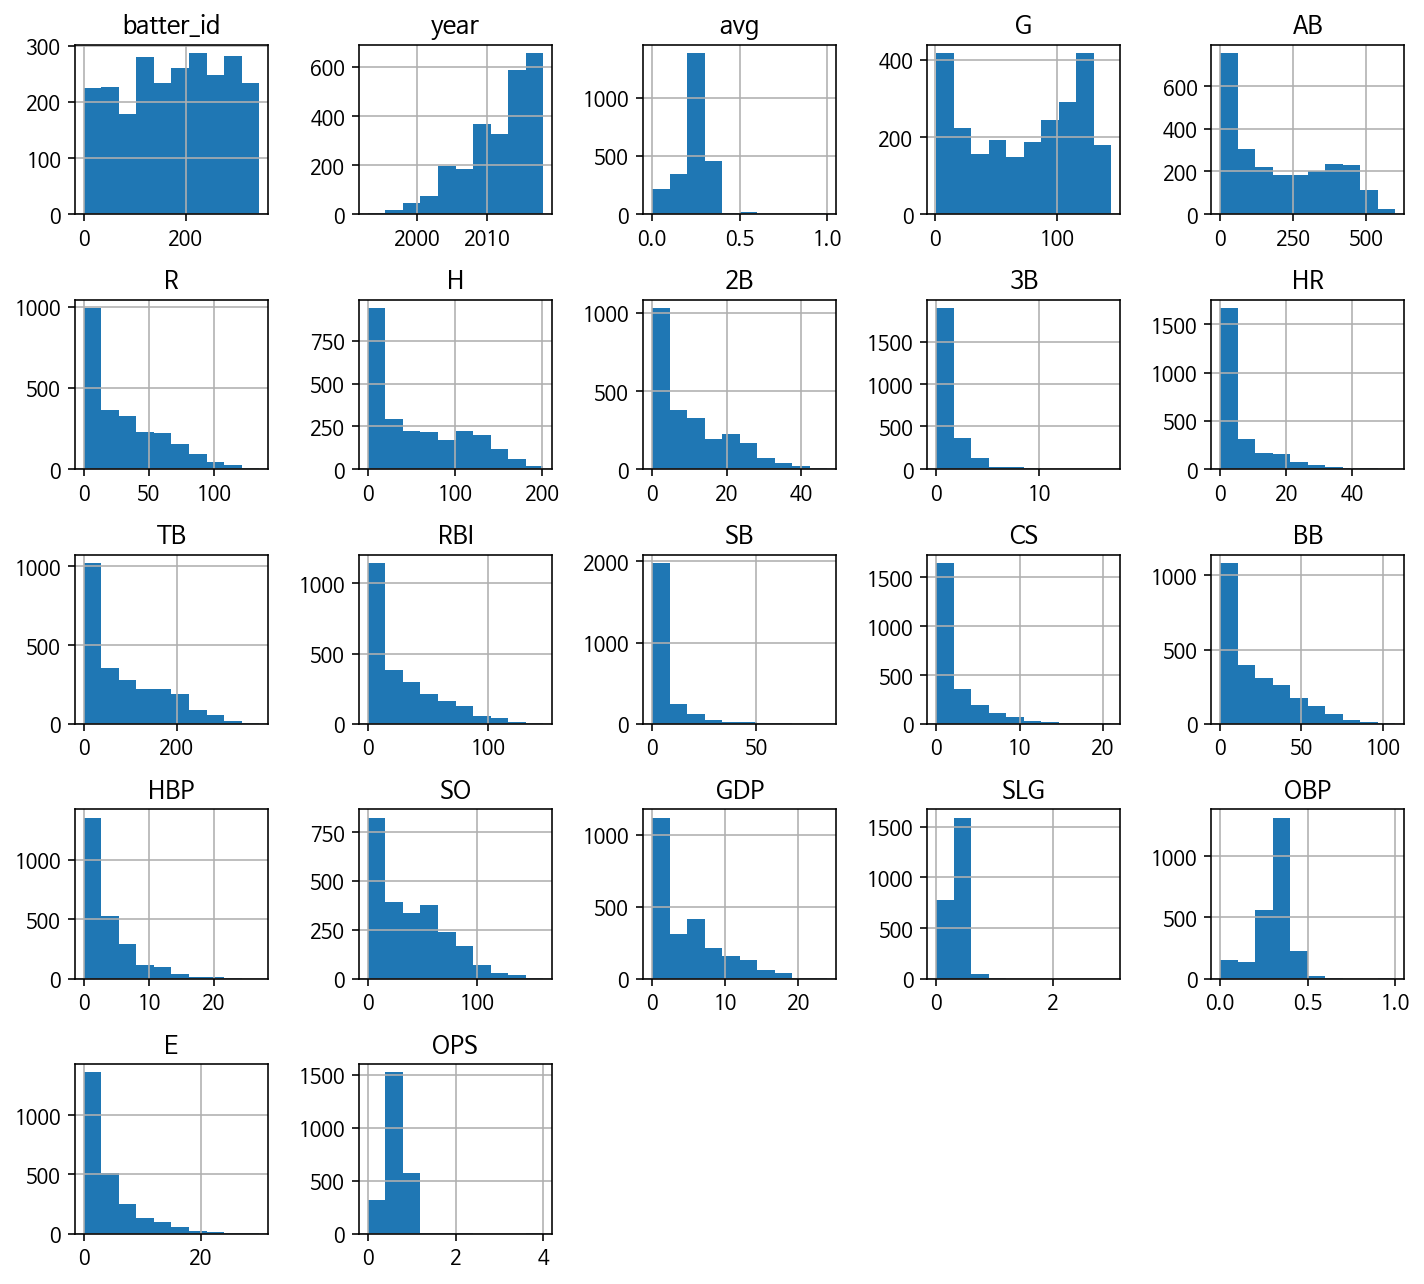

In [338]:
regular_season_df.hist(figsize=(10,9))
plt.tight_layout() # 그래프 간격 설정
plt.show()

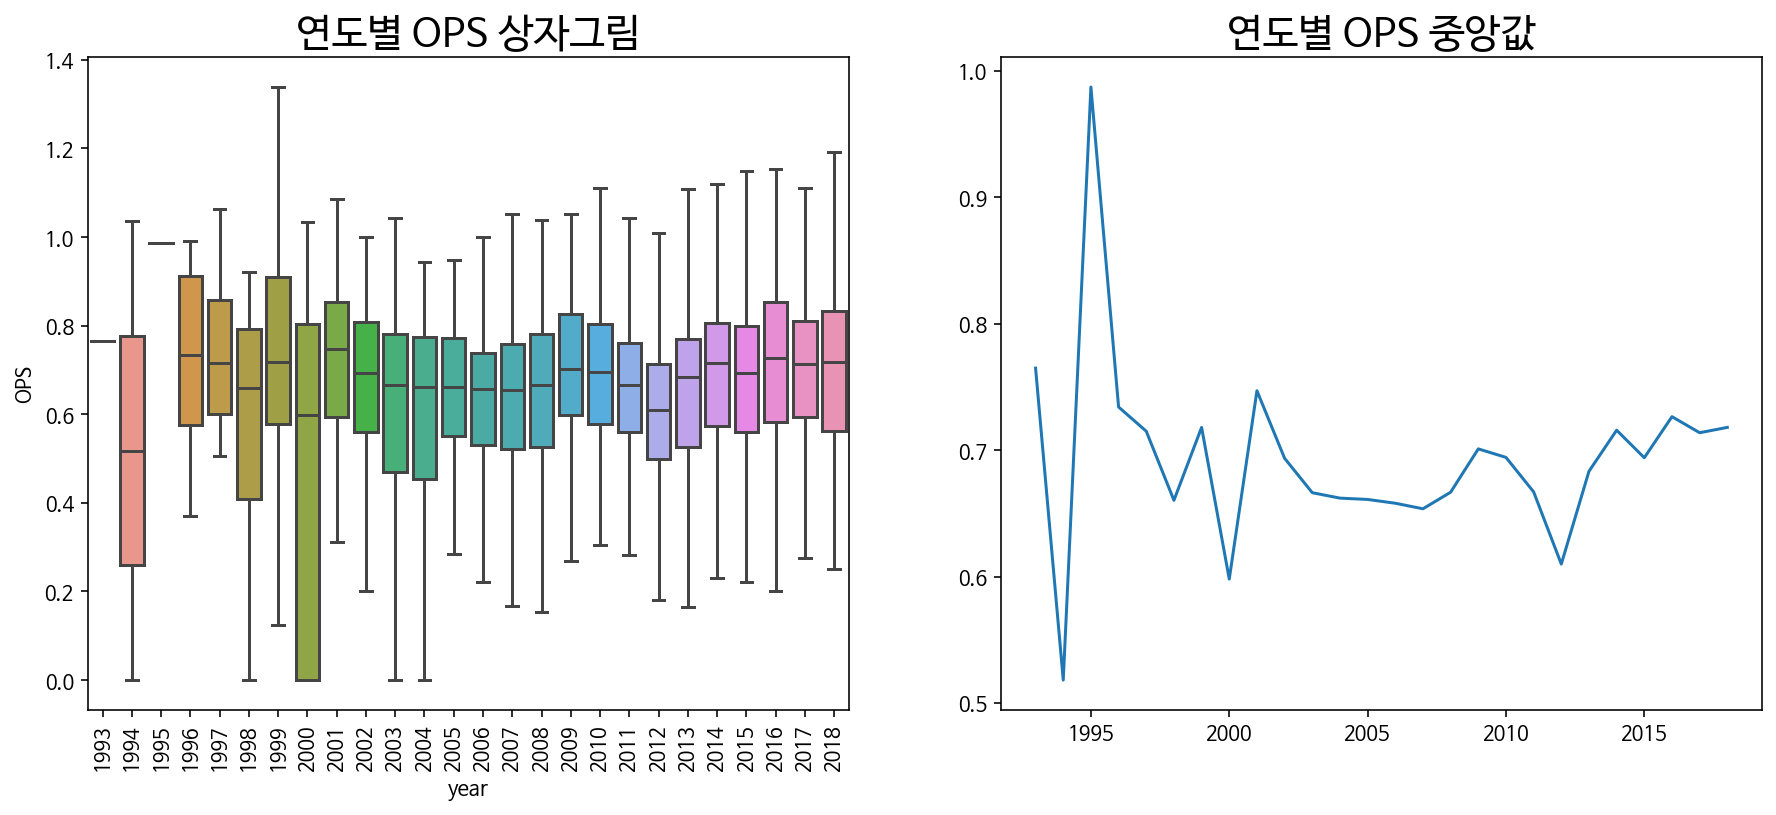

In [339]:
plt.figure(figsize=(15,6)) # 그래프 크기 조정
plt.subplot(1,2,1) # 1행 2열의 첫 번째(1행, 1열) 그래프
g = sns.boxplot(x="year", y="OPS", data=regular_season_df, showfliers=False)
g.set_title('연도별 OPS 상자그림', size = 20)
g.set_xticklabels(g.get_xticklabels(),rotation=90)
plt.subplot(1,2,2)
plt.plot(regular_season_df.groupby('year')['OPS'].median())
plt.title('연도별 OPS 중앙값', size = 20)
plt.show()

In [340]:
# pd.crosstab(): 범주형 변수로 되어있는 요인(factors)별로 교차분석(cross tabulations) 해서,
# 행, 열 요인 기준 별로 빈도를 세어서 도수분포표(frequency table), 
# 교차표(contingency table) 를 만들어주는 함수
pd.crosstab(regular_season_df['year'],'count').T

year,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
col_0,,,,,,,,,,,,,,,,,,,,,,,,,,
count,1,2,1,7,8,10,14,20,32,43,54,68,73,85,98,115,124,130,151,174,194,186,207,213,217,227


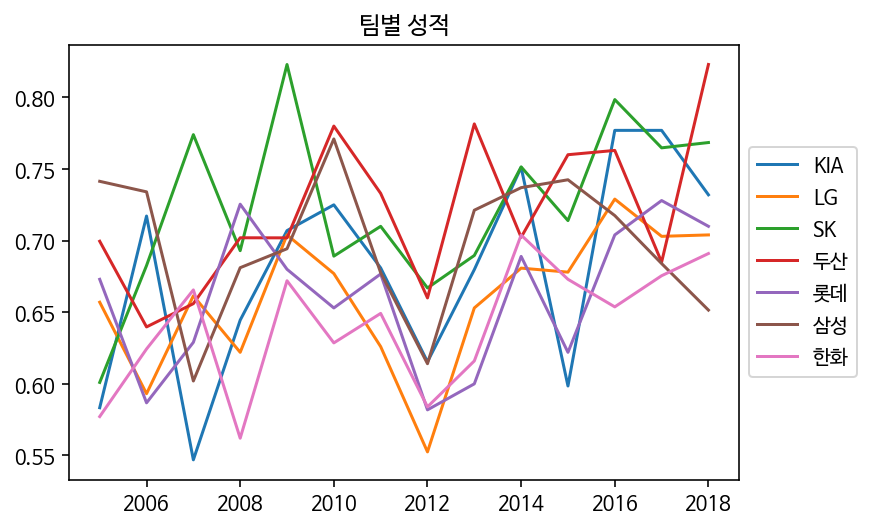

In [341]:
# 연도별 팀의 OPS 중앙값 계산
med_OPS_team = regular_season_df.pivot_table(index=['team'], columns='year',
                                             values='OPS', aggfunc='median')
# 2005년 이후에 결측치가 존재하지 않는 팀만 확인
team_idx = med_OPS_team.loc[:,2005:].isna().sum(axis=1) <= 0

plt.plot(med_OPS_team.loc[team_idx,2005:].T)
plt.legend(med_OPS_team.loc[team_idx,2005:].T.columns, 
           loc='center left', bbox_to_anchor=(1, 0.5)) # 그래프 범례를 그래프 밖에 위치
plt.title('팀별 성적')
plt.show()

In [342]:
import re

regular_season_df['weight'] = regular_season_df['height/weight'].apply(
    lambda x: int(re.findall('\d+',x.split('/')[1])[0]) if pd.notnull(x) else x)

regular_season_df['height'] = regular_season_df['height/weight'].apply(
    lambda x: int(re.findall('\d+',x.split('/')[0])[0]) if pd.notnull(x) else x)

print(regular_season_df['height/weight'][0], regular_season_df['height'][0],
      regular_season_df['weight'][0])

177cm/93kg 177.0 93.0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


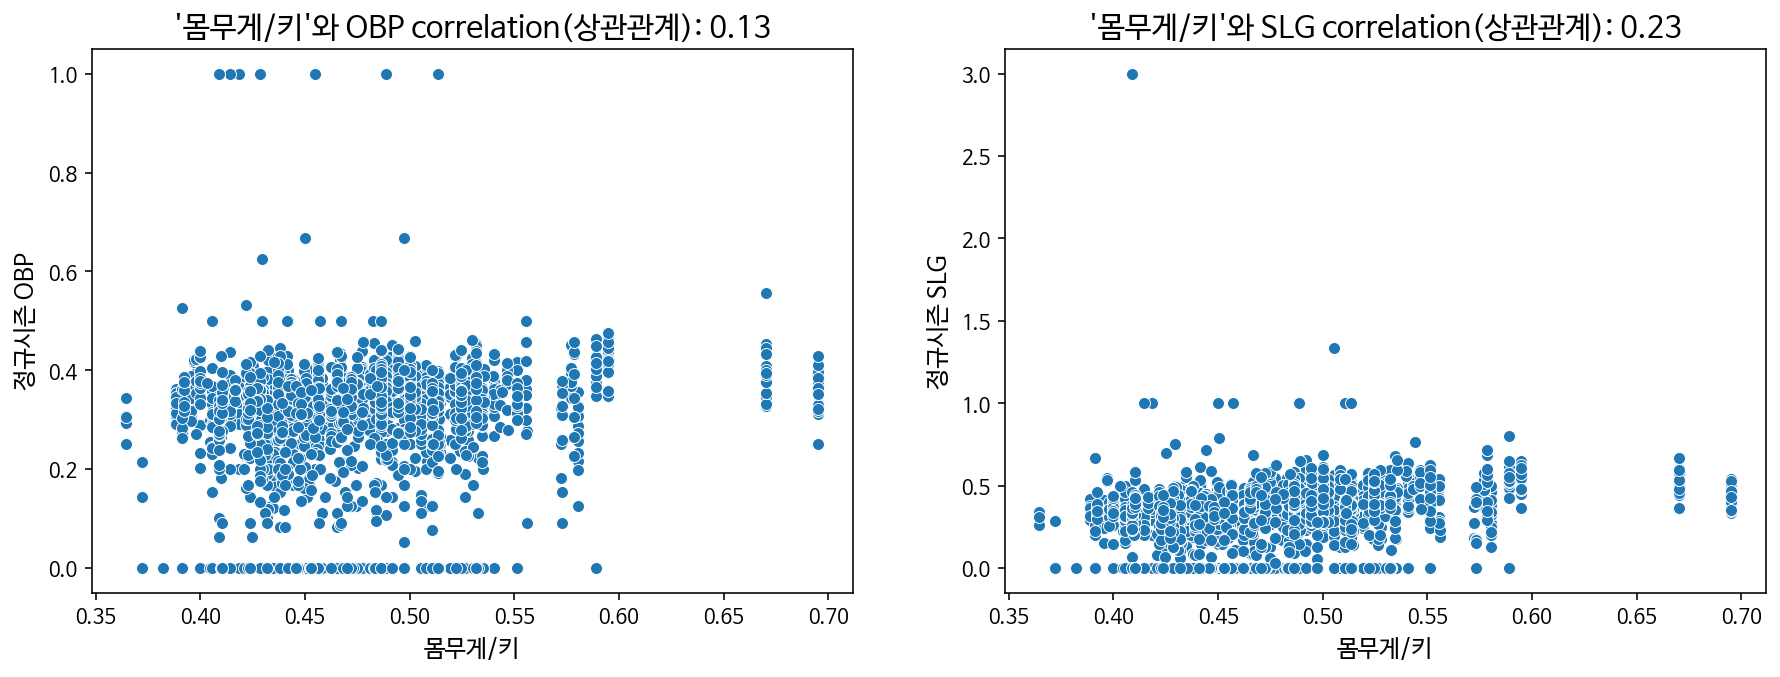

In [343]:
# 몸무게/키 계산
regular_season_df['weight_per_height'] = regular_season_df['weight'] /  regular_season_df['height']
plt.figure(figsize=(15, 5)) # 그래프 크기 조정
plt.subplot(1, 2, 1) # 1행 2열의 첫번째(1행, 1열) 그래프

# 정규시즌과 프리시즌의 상관관계 계산
correlation = regular_season_df['weight_per_height'].corr(regular_season_df['OBP'])
sns.scatterplot(regular_season_df['weight_per_height'], regular_season_df['OBP'])
plt.title("'몸무게/키'와 OBP correlation(상관관계): " + str(np.round(correlation, 2)), fontsize=15)
plt.ylabel('정규시즌 OBP',fontsize=12)
plt.xlabel('몸무게/키', fontsize=12)
plt.subplot(1, 2, 2)

# 정규시즌과 프리시즌의 상관관계 계산
correlation = regular_season_df['weight_per_height'].corr(regular_season_df['SLG'])
sns.scatterplot(regular_season_df['weight_per_height'], regular_season_df['SLG'])
plt.title("'몸무게/키'와 SLG correlation(상관관계): " + str(np.round(correlation, 2)), \
          fontsize=15)
plt.ylabel('정규시즌 SLG', fontsize=12)
plt.xlabel('몸무게/키', fontsize=12)
plt.show()

In [344]:
regular_season_df['position'].value_counts()

내야수(우투우타)    643
외야수(우투우타)    230
외야수(좌투좌타)    201
포수(우투우타)     189
외야수(우투좌타)    184
내야수(우투좌타)    141
내야수(좌투좌타)     36
포수(우투좌타)      14
외야수(우투양타)      7
내야수(우투양타)      7
Name: position, dtype: int64

In [345]:
# position
regular_season_df['pos']=regular_season_df['position'].apply(
    lambda x: x.split('(')[0] if pd.notnull(x) else x)

# 우타, 좌타, 양타
regular_season_df['hit_way'] = regular_season_df['position'].apply(
    lambda x: x[-3:-1] if pd.notnull(x) else x)
print(regular_season_df['position'][0], regular_season_df['pos'][0], 
      regular_season_df['hit_way'][0])

내야수(우투우타) 내야수 우타


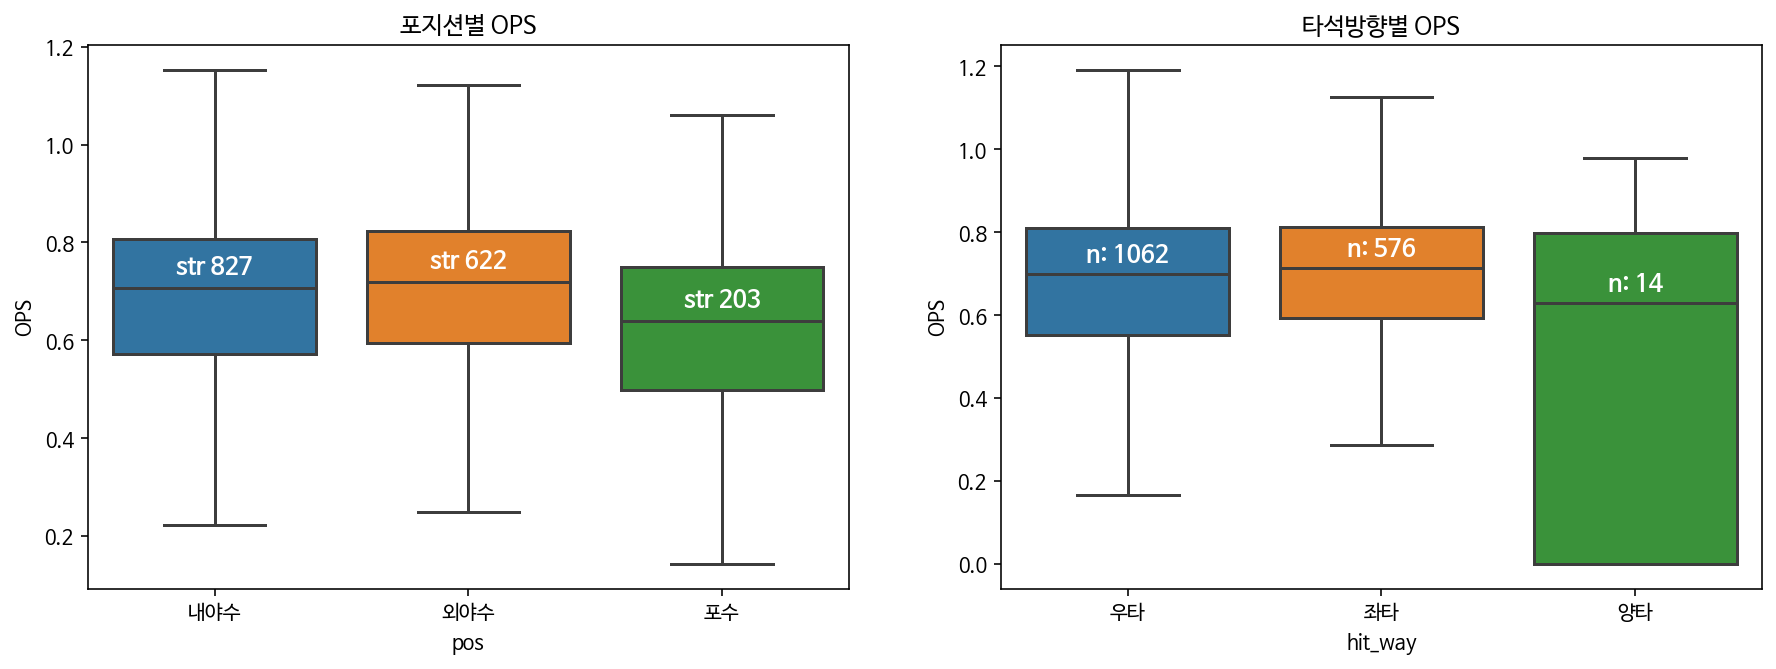

In [346]:
plt.figure(figsize=(15,5)) # 그래프 크기 조정
plt.subplot(1,2,1) # 1행 2열의 첫번째(1행, 1열) 그래프
ax = sns.boxplot(x='pos', y='OPS', data = regular_season_df, showfliers=False)

# position 별 OPS 중앙값
medians = regular_season_df.groupby(['pos'])['OPS'].median().to_dict()

# position별 관측치 수
nobs = regular_season_df['pos'].value_counts().to_dict()

# 키 값을 'n: 값' 형식으로 변환
for key in nobs: nobs[key] = "str " + str(nobs[key])

# 그래프의 Xticks text 값 얻기
xticks_labels = [item.get_text() for item in ax.get_xticklabels()]

# tick은 tick의 위치, label은 그에 해당하는 text 값
for label in ax.get_xticklabels():
    ax.text(xticks_labels.index(label.get_text()), 
            medians[label.get_text()] + 0.03, nobs[label.get_text()],
            horizontalalignment='center', size='large', color='w', weight='semibold')
    
ax.set_title('포지션별 OPS')
####################

plt.subplot(1,2,2) # 1행 2열의 두 번째(1행, 2열) 그래프
ax = sns.boxplot(x='hit_way', y='OPS', data = regular_season_df, showfliers=False)

# 타자 방향별 OPS 중앙값
medians = regular_season_df.groupby(['hit_way'])['OPS'].median().to_dict()
# 타자 방향 관측치 수
nobs = regular_season_df['hit_way'].value_counts().to_dict()
# 키 값을 'n: 값' 형식으로 변환
for key in nobs: nobs[key] = "n: " + str(nobs[key])

# 그래프의 Xticks text 값 얻기
xticks_labels = [item.get_text() for item in ax.get_xticklabels()]

# tick은 tick의 위치, label은 그에 해당하는 text 값
for label in ax.get_xticklabels():
    ax.text(xticks_labels.index(label.get_text()), medians[label.get_text()] + 0.03,
            nobs[label.get_text()], horizontalalignment='center', size='large',
            color='w', weight='semibold')
ax.set_title('타석방향별 OPS')

plt.show()

In [347]:
regular_season_df['career'].head()

0    쿠바 Ciego de Avila Maximo Gomez Baez(대)
1                         광주대성초-광주동성중-광주동성고
2                         광주대성초-광주동성중-광주동성고
3                         광주대성초-광주동성중-광주동성고
4                         광주대성초-광주동성중-광주동성고
Name: career, dtype: object

In [348]:
# career를 split
foreign_country = regular_season_df['career'].apply(lambda x: x.replace('-', ' ').split(' ')[0])
foreign_country[:5]

0       쿠바
1    광주대성초
2    광주대성초
3    광주대성초
4    광주대성초
Name: career, dtype: object

In [349]:
foreign_country.apply(lambda x: np.nan if '초' in x else x)

0        쿠바
1       NaN
2       NaN
3       NaN
4       NaN
       ... 
2449    NaN
2450    NaN
2451    NaN
2452    NaN
2453    NaN
Name: career, Length: 2454, dtype: object

In [350]:
# 외국만 추출
foreign_country_list = list(set(foreign_country.apply(lambda x: np.nan if '초' in x else x)))
foreign_country_list

[nan, '도미니카', '미국', '캐나다', '쿠바', '네덜란드']

In [351]:
# 결측치 처리
foreign_country_list = [x for x in foreign_country_list if str(x) != 'nan']
foreign_country_list

['도미니카', '미국', '캐나다', '쿠바', '네덜란드']

In [352]:
regular_season_df['country'] = foreign_country
regular_season_df['country'] = regular_season_df['country'].apply(
    lambda x: x if pd.isnull(x)
                 else ('foreign' if x in foreign_country_list else 'korean'))
regular_season_df[['country']].head()

,country
0,foreign
1,korean
2,korean
3,korean
4,korean


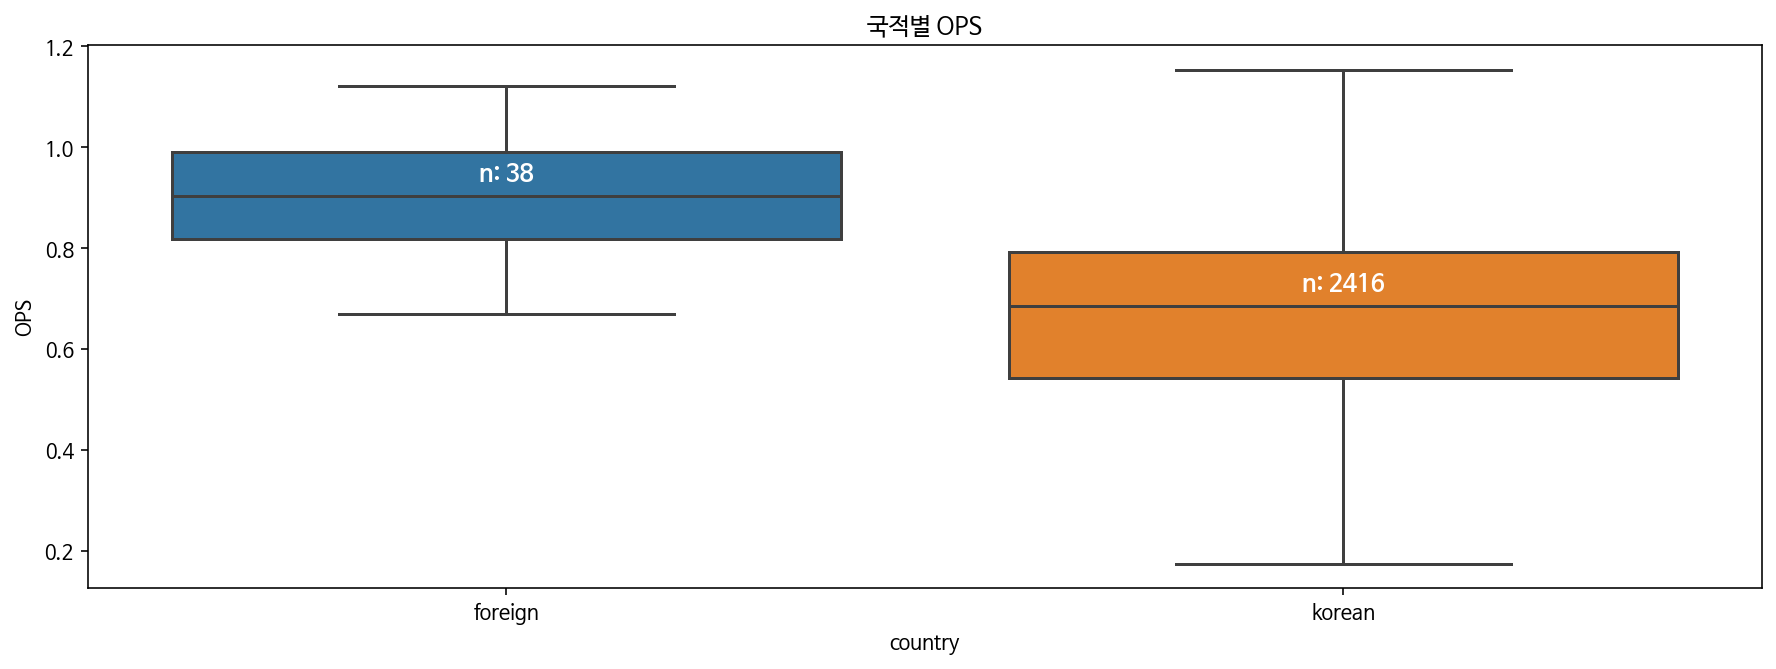

In [353]:
plt.figure(figsize=(15,5)) # 그래프 크기 조정
ax = sns.boxplot(x='country', y='OPS', data = regular_season_df, showfliers=False)

# 내외국인 별 OPS 중앙값 dict
medians = regular_season_df.groupby(['country'])['OPS'].median().to_dict()
# 내외국인 관측치 수 dict
nobs = regular_season_df['country'].value_counts().to_dict()
# 키 값을 'n: 값' 형식으로 변환 
for key in nobs: nobs[key] = "n: " + str(nobs[key])

# 그래프의 Xticks text 값 얻기
xticks_labels = [item.get_text() for item in ax.get_xticklabels()]
    
for label in ax.get_xticklabels(): # tick은 tick의 위치, label은 그에 해당하는 text 값 
    ax.text(xticks_labels.index(label.get_text()), medians[label.get_text()] + 0.03, 
            nobs[label.get_text()], # x 좌표, y 좌표, 해당 text
            horizontalalignment='center', size='large', color='w', weight='semibold') 
ax.set_title('국적별 OPS')
plt.show()

In [354]:
regular_season_df['starting_salary'].value_counts()

10000만원     177
6000만원      117
3000만원      105
9000만원       97
5000만원       91
8000만원       89
30000만원      74
12000만원      62
4000만원       62
18000만원      54
7000만원       53
11000만원      49
13000만원      48
20000만원      46
25000만원      45
15000만원      41
16000만원      28
14000만원      26
28000만원      20
43000만원      17
45000만원      16
27000만원      15
21000만원      13
23000만원      12
33000만원      10
6500만원       10
100000달러      4
300000달러      3
50000달러       2
17000만원       1
Name: starting_salary, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


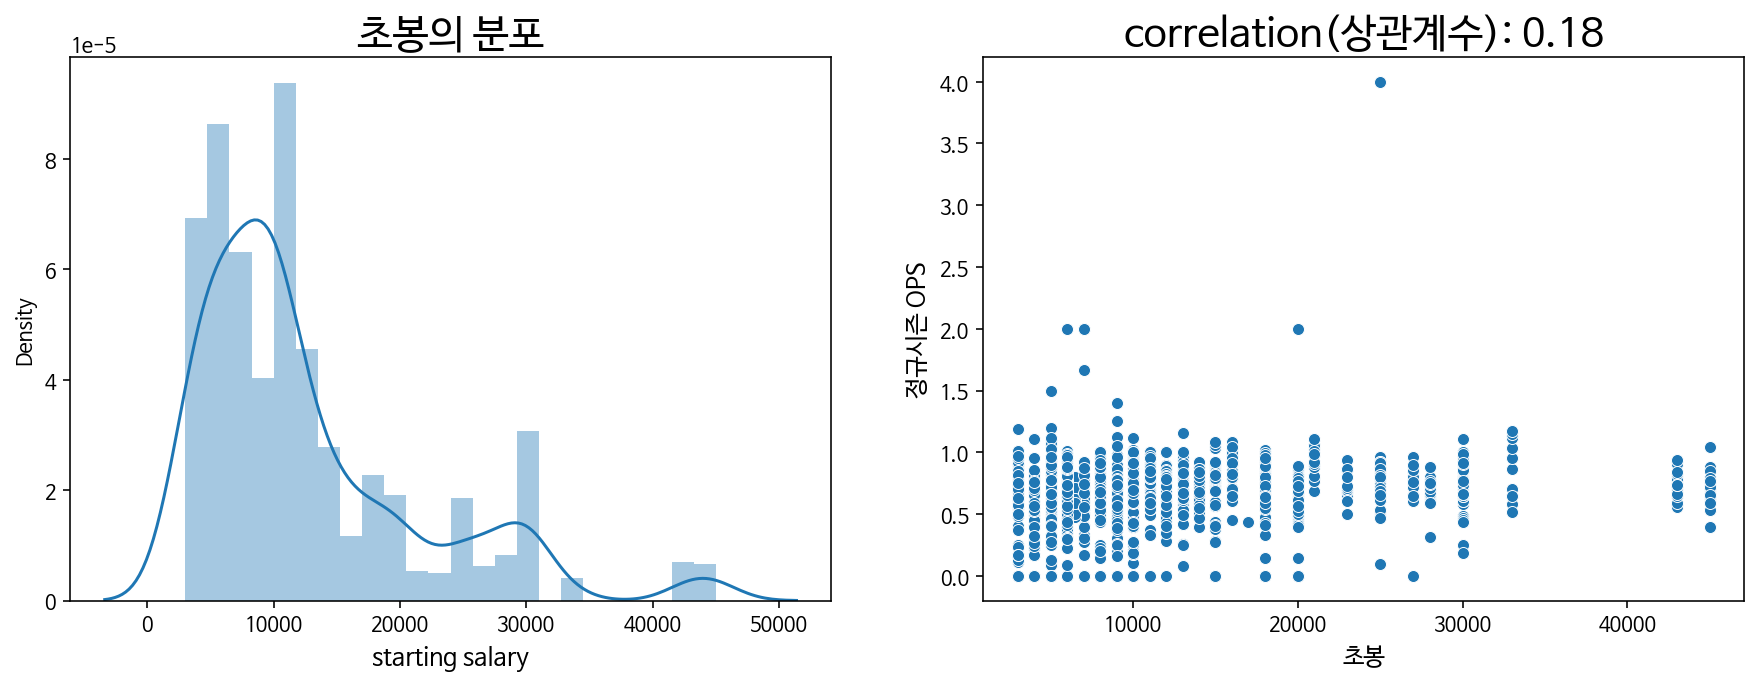

In [355]:
# 결측치라면 그대로 0으로 두고 ‘만원’이 포함되어 있다면 숫자만 뽑아서 초봉으로 넣어준다. 그외 만 원 단위가 아닌 초봉은 결측치로 처리한다.
regular_season_df['starting_salary'] = regular_season_df['starting_salary'].apply(
    lambda x: x if pd.isnull(x)
                 else(int(re.findall('\d+',x)[0]) if '만원' in x else np.nan))

plt.figure(figsize=(15,5)) # 그래프 크기 조정
plt.subplot(1,2,1) # 1행 2열의 첫 번째(1행, 1열) 그래프
b=sns.distplot(regular_season_df['starting_salary'].loc[regular_season_df['starting_salary'].notnull()], hist=True)
b.set_xlabel("starting salary",fontsize=12)
b.set_title('초봉의 분포', fontsize=20)

plt.subplot(1,2,2) # 1행 2열의 두 번째(1행, 2열) 그래프

# 정규시즌과 프리시즌의 상관관계 계산
correlation = regular_season_df['starting_salary'].corr(regular_season_df['OPS'])
b = sns.scatterplot(regular_season_df['starting_salary'], regular_season_df['OPS'])
b.axes.set_title('correlation(상관계수): '+str(np.round(correlation,2)), fontsize=20)
b.set_ylabel("정규시즌 OPS",fontsize=12)
b.set_xlabel("초봉",fontsize=12)
plt.show()

### 1.2.3. 일별 데이터 분석

In [356]:
day_by_day_df = pd.read_csv('/content/Regular_Season_Batter_Day_by_Day_b4.csv')
display(day_by_day_df.shape, day_by_day_df.head())

(112273, 20)

,batter_id,batter_name,date,opposing_team,avg1,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,HBP,SO,GDP,avg2,year
0,0,가르시아,3.24,NC,0.333,3,1,1,0,0,0,0,0,0,1,0,1,0,0.333,2018
1,0,가르시아,3.25,NC,0.000,4,0,0,0,0,0,0,0,0,0,0,1,0,0.143,2018
2,0,가르시아,3.27,넥센,0.200,5,0,1,0,0,0,0,0,0,0,0,0,0,0.167,2018
3,0,가르시아,3.28,넥센,0.200,5,1,1,0,0,0,1,0,0,0,0,0,0,0.176,2018
4,0,가르시아,3.29,넥센,0.250,4,0,1,0,0,0,3,0,0,0,0,0,1,0.190,2018


In [357]:
# 날짜(date)를 ‘.’을 기준으로 나누고 첫 번째 값을 월(month)로 지정 
day_by_day_df['month'] = day_by_day_df['date'].apply(lambda x: str(x).split('.')[0])

# 각 연도의 월별 평균 누적 타율(avg2) 계산
agg_df = day_by_day_df.groupby(['year','month'])['avg2'].mean().reset_index()

# pivot_table을 이용해 데이터 변형
agg_df = agg_df.pivot_table(index=['month'], columns='year', values = 'avg2')
agg_df

year,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
month,,,,,,,,,,,,,,,,,,
10,0.356400,0.269065,0.216583,0.203636,NaN,0.260985,0.249888,0.249638,0.033333,NaN,0.243526,0.246949,0.257841,0.273537,0.274042,0.282547,0.280289,0.277482
3,NaN,NaN,NaN,NaN,NaN,0.261714,0.261714,0.271982,NaN,0.239861,NaN,NaN,0.231236,0.210598,0.214485,0.257857,0.161979,0.238015
4,0.205217,0.319792,0.250296,0.259663,0.235317,0.267106,0.215703,0.261531,0.252546,0.262953,0.247133,0.234199,0.267994,0.259918,0.255175,0.266711,0.259430,0.263953
5,0.297157,0.267990,0.241491,0.237954,0.253527,0.264283,0.237329,0.262535,0.280842,0.272934,0.250877,0.247844,0.268355,0.273899,0.261307,0.275240,0.274374,0.274083
6,0.306926,0.275867,0.252290,0.248800,0.249913,0.264392,0.260600,0.270766,0.278781,0.274791,0.263264,0.254577,0.270533,0.283480,0.268999,0.276307,0.279060,0.280630
7,0.293171,0.266650,0.244230,0.251973,0.256396,0.262464,0.259171,0.264870,0.275054,0.265501,0.264829,0.261513,0.262812,0.275677,0.272685,0.283192,0.284565,0.280817
8,0.303489,0.270481,0.252319,0.249460,0.243570,0.265369,0.270258,0.265173,0.271796,0.271075,0.262048,0.258069,0.268122,0.282025,0.272377,0.283105,0.283283,0.283923
9,0.308636,0.248333,0.243780,0.203953,0.237058,0.258794,0.251022,0.252942,0.264468,0.265312,0.258500,0.251232,0.260571,0.272411,0.271629,0.276513,0.273213,0.277841


year,2011,2012,2013,2014,2015,2016,2017,2018
month,,,,,,,,
4,0.247133,0.234199,0.267994,0.259918,0.255175,0.266711,0.259430,0.263953
5,0.250877,0.247844,0.268355,0.273899,0.261307,0.275240,0.274374,0.274083
6,0.263264,0.254577,0.270533,0.283480,0.268999,0.276307,0.279060,0.280630
7,0.264829,0.261513,0.262812,0.275677,0.272685,0.283192,0.284565,0.280817
8,0.262048,0.258069,0.268122,0.282025,0.272377,0.283105,0.283283,0.283923
9,0.258500,0.251232,0.260571,0.272411,0.271629,0.276513,0.273213,0.277841


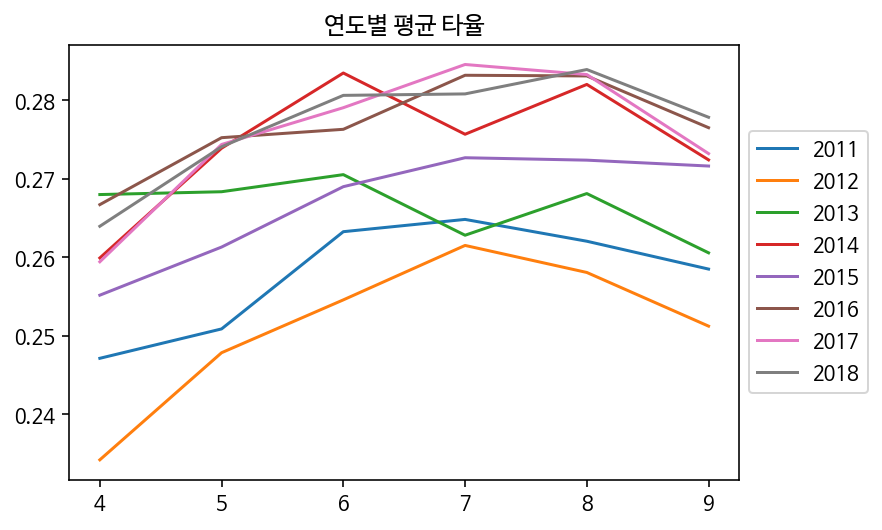

In [410]:
display(agg_df.iloc[2:, 10:])
plt.plot(agg_df.iloc[2:,10:]) # 2011~2018년 데이터만 이용
plt.legend(agg_df.iloc[2:,10:].columns,
           loc='center left', bbox_to_anchor=(1, 0.5)) # 범례 그래프 밖에 위치
plt.title('연도별 평균 타율')
plt.show()

## 1.3. 데이터 전처리

In [411]:
pd.DataFrame(regular_season_df.isna().sum()).T

,batter_id,batter_name,year,team,avg,G,AB,R,H,2B,3B,HR,TB,RBI,SB,CS,BB,HBP,SO,GDP,SLG,OBP,E,height/weight,year_born,position,career,starting_salary,OPS,weight,height,weight_per_height,pos,hit_way,country,SF,SF_1,age
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,802,0,802,0,0,0,0,0,0,802,802,0,0,26,0


In [412]:
# 수치형 타입의 변수 저장
numerics = [
    'int16', 'int32', 'int64', 'float16', 'float32', 'float64'] # 모든 numeric(수치형) 타입
num_cols = regular_season_df.select_dtypes(include=numerics).columns

# 수치형 타입 변수 중 결측치가 하나라도 존재하는 행 출력
# isna().sum(axis=1) -> 열 기준의 결측치 개수
# df.loc[]를 통해 결측치 0개 이상 데이터를 추출
regular_season_df.loc[regular_season_df[num_cols].isna().sum(axis=1) > 0,num_cols].head()

,batter_id,year,avg,G,AB,R,H,2B,3B,HR,TB,RBI,SB,CS,BB,HBP,SO,GDP,SLG,OBP,E,starting_salary,OPS,weight,height,weight_per_height,SF,SF_1,age
18,138,2013,0.0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.000000,0.0,NaN,31
175,21,2000,0.0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.000000,0.0,NaN,24
200,24,2002,0.0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0.0,0.0,0,11000.0,0.0,85.0,182.0,0.467033,0.0,NaN,20
265,31,2007,0.0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,13000.0,0.0,89.0,183.0,0.486339,0.0,NaN,19
385,45,2007,0.0,3,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0.0,0.0,0,7000.0,0.0,72.0,172.0,0.418605,0.0,NaN,20


In [413]:
# 수치형 변수에 포함되는 데이터 타입 선정
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

# 정규 시즌 데이터에서 결측치를 0으로 채우기
regular_season_df[regular_season_df.select_dtypes(include=numerics).columns] =  regular_season_df[regular_season_df.select_dtypes(include=numerics).columns].fillna(0)
regular_season_df.head()

,batter_id,batter_name,year,team,avg,G,AB,R,H,2B,3B,HR,TB,RBI,SB,CS,BB,HBP,SO,GDP,SLG,OBP,E,height/weight,year_born,position,career,starting_salary,OPS,weight,height,weight_per_height,pos,hit_way,country,SF,SF_1,age
0,0,가르시아,2018,LG,0.339,50,183,27,62,9,0,8,95,34,5,0,9,8,25,3,0.519,0.383,9,177cm/93kg,1985년 04월 12일,내야수(우투우타),쿠바 Ciego de Avila Maximo Gomez Baez(대),0.0,0.902,93.0,177.0,0.525424,내야수,우타,foreign,6.0,0.032787,33
1,1,강경학,2011,한화,0.000,2,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0.000,0.000,1,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000.0,0.000,72.0,180.0,0.400000,내야수,좌타,korean,0.0,0.000000,19
2,1,강경학,2014,한화,0.221,41,86,11,19,2,3,1,30,7,0,0,13,2,28,1,0.349,0.337,6,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000.0,0.686,72.0,180.0,0.400000,내야수,좌타,korean,-0.0,-0.000000,22
3,1,강경학,2015,한화,0.257,120,311,50,80,7,4,2,101,27,4,3,40,5,58,3,0.325,0.348,15,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000.0,0.673,72.0,180.0,0.400000,내야수,좌타,korean,3.0,0.009646,23
4,1,강경학,2016,한화,0.158,46,101,16,16,3,2,1,26,7,0,0,8,2,30,5,0.257,0.232,7,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000.0,0.489,72.0,180.0,0.400000,내야수,좌타,korean,1.0,0.009901,24


In [414]:
# 일별 데이터에서 결측치를 0으로 채우기
day_by_day_df[day_by_day_df.select_dtypes(include=numerics).columns] =  day_by_day_df[day_by_day_df.select_dtypes(include=numerics).columns].fillna(0)
day_by_day_df.head()

,batter_id,batter_name,date,opposing_team,avg1,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,HBP,SO,GDP,avg2,year,month
0,0,가르시아,3.24,NC,0.333,3,1,1,0,0,0,0,0,0,1,0,1,0,0.333,2018,3
1,0,가르시아,3.25,NC,0.000,4,0,0,0,0,0,0,0,0,0,0,1,0,0.143,2018,3
2,0,가르시아,3.27,넥센,0.200,5,0,1,0,0,0,0,0,0,0,0,0,0,0.167,2018,3
3,0,가르시아,3.28,넥센,0.200,5,1,1,0,0,0,1,0,0,0,0,0,0,0.176,2018,3
4,0,가르시아,3.29,넥센,0.250,4,0,1,0,0,0,3,0,0,0,0,0,1,0.190,2018,3


In [415]:
# 프리시즌 데이터에서 결측치를 0으로 채우기
preseason_df[preseason_df.select_dtypes(include=numerics).columns] = preseason_df[preseason_df.select_dtypes(include=numerics).columns].fillna(0)
preseason_df.head()

,batter_id,batter_name,year,team,avg,G,AB,R,H,2B,3B,HR,TB,RBI,SB,CS,BB,HBP,SO,GDP,SLG,OBP,E,height/weight,year_born,position,career,starting_salary,OPS,new_idx
0,0,가르시아,2018,LG,0.350,7,20,1,7,1,0,1,11,5,0,0,2,0,3,1,0.550,0.409,1,177cm/93kg,1985년 04월 12일,내야수(우투우타),쿠바 Ciego de Avila Maximo Gomez Baez(대),NaN,0.959,가르시아2018
1,1,강경학,2011,한화,0.000,4,2,2,0,0,0,0,0,1,0,1,0,2,1,0,0.000,0.500,0,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.500,강경학2011
2,1,강경학,2014,한화,-,4,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0.000,0.000,0,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.000,강경학2014
3,1,강경학,2015,한화,0.130,10,23,3,3,0,0,0,3,1,3,0,4,1,9,0,0.130,0.286,2,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.416,강경학2015
4,1,강경학,2016,한화,0.188,14,32,4,6,1,1,0,9,2,1,2,0,1,10,0,0.281,0.212,0,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.493,강경학2016


In [416]:
# 수치형이 아닌 변수 추출
not_num_cols = [x for x in regular_season_df.columns if x not in num_cols]

# 수치형이 아닌 변수 중 결측치가 하나라도 존재하는 행 출력
# isna().sum(axis=1) -> 열 기준의 결측치 개수
# df.loc[]를 통해 결측치 0개 이상 데이터를 추출
regular_season_df.loc[regular_season_df[not_num_cols].isna().sum(axis=1) > 0,
                      not_num_cols].head()

,batter_name,team,height/weight,year_born,position,career,pos,hit_way,country
12,백승룡,한화,NaN,1982년 08월 16일,NaN,사직초(부산극동리틀)-사직중-경남상고-경성대-한화-넥센,NaN,NaN,korean
13,백승룡,한화,NaN,1982년 08월 16일,NaN,사직초(부산극동리틀)-사직중-경남상고-경성대-한화-넥센,NaN,NaN,korean
14,백승룡,한화,NaN,1982년 08월 16일,NaN,사직초(부산극동리틀)-사직중-경남상고-경성대-한화-넥센,NaN,NaN,korean
15,백승룡,한화,NaN,1982년 08월 16일,NaN,사직초(부산극동리틀)-사직중-경남상고-경성대-한화-넥센,NaN,NaN,korean
16,백승룡,한화,NaN,1982년 08월 16일,NaN,사직초(부산극동리틀)-사직중-경남상고-경성대-한화-넥센,NaN,NaN,korean


In [417]:
# 삭제할 데이터 추출
drop_idx = regular_season_df.loc[
    # 안타가 0개 이상이면서 장타율이 0인 경우
    ((regular_season_df['H'] > 0) & (regular_season_df['SLG']==0)) |
        
    # 안타가 0개 이상 혹은 볼넷이 0개 이상 혹은 몸에 맞은 볼이 0개 이상이면서
    # 출루율이 0인 경우
    (((regular_season_df['H'] > 0) |
      (regular_season_df['BB'] > 0) |
      (regular_season_df['HBP'] > 0)) &
     (regular_season_df['OBP'] == 0))
].index         

# 데이터 삭제
regular_season_df = regular_season_df.drop(drop_idx).reset_index(drop=True)
regular_season_df.head()

,batter_id,batter_name,year,team,avg,G,AB,R,H,2B,3B,HR,TB,RBI,SB,CS,BB,HBP,SO,GDP,SLG,OBP,E,height/weight,year_born,position,career,starting_salary,OPS,weight,height,weight_per_height,pos,hit_way,country,SF,SF_1,age
0,0,가르시아,2018,LG,0.339,50,183,27,62,9,0,8,95,34,5,0,9,8,25,3,0.519,0.383,9,177cm/93kg,1985년 04월 12일,내야수(우투우타),쿠바 Ciego de Avila Maximo Gomez Baez(대),0.0,0.902,93.0,177.0,0.525424,내야수,우타,foreign,6.0,0.032787,33
1,1,강경학,2011,한화,0.000,2,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0.000,0.000,1,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000.0,0.000,72.0,180.0,0.400000,내야수,좌타,korean,0.0,0.000000,19
2,1,강경학,2014,한화,0.221,41,86,11,19,2,3,1,30,7,0,0,13,2,28,1,0.349,0.337,6,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000.0,0.686,72.0,180.0,0.400000,내야수,좌타,korean,-0.0,-0.000000,22
3,1,강경학,2015,한화,0.257,120,311,50,80,7,4,2,101,27,4,3,40,5,58,3,0.325,0.348,15,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000.0,0.673,72.0,180.0,0.400000,내야수,좌타,korean,3.0,0.009646,23
4,1,강경학,2016,한화,0.158,46,101,16,16,3,2,1,26,7,0,0,8,2,30,5,0.257,0.232,7,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000.0,0.489,72.0,180.0,0.400000,내야수,좌타,korean,1.0,0.009901,24


### 1.3.2. 규정 타수 정의
규정타수란 타자가 한 시즌의 성적을 공식적으로 인정 받기 위해 채워야 하는 최소 타석

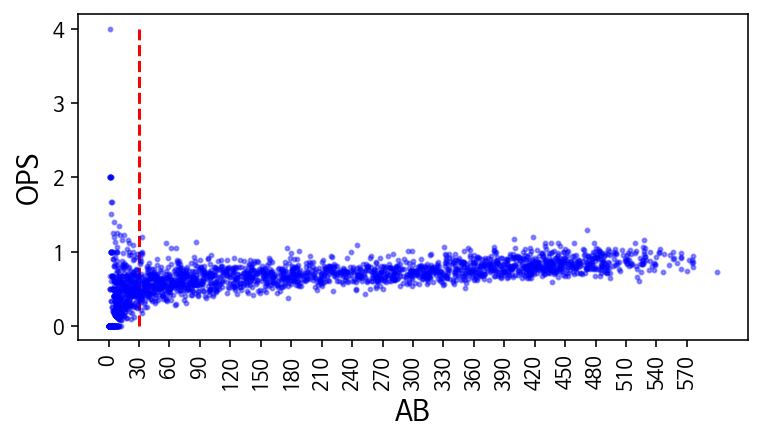

In [366]:
plt.figure(figsize=(6, 3)) # 크기 조정
plt.plot('AB', 'OPS', data=regular_season_df, linestyle='none', marker='o', 
         markersize=2, color='blue', alpha=0.4)
plt.xlabel('AB', fontsize=14)
plt.ylabel('OPS', fontsize=14)
plt.xticks(list(range(min(regular_season_df['AB']), max(regular_season_df['AB']), 30)),
           rotation=90)
plt.vlines(30,ymin=min(regular_season_df['OPS']),ymax=max(regular_season_df['OPS']),
           linestyles='dashed', colors='r')
plt.show()

In [418]:
# OPS 이상치 탐색을 위한 수치 정의
Q1 = regular_season_df['OPS'].quantile(0.25)
Q3 = regular_season_df['OPS'].quantile(0.75)
IQR = Q3 - Q1

# 실제 OPS 이상치 탐색
regular_season_df.loc[(regular_season_df['OPS'] < (Q1 - 1.5 * IQR)) |
                      (regular_season_df['OPS'] > (Q3 + 1.5 * IQR))].sort_values(
    by=['AB'], axis=0, ascending=False)[['batter_name','AB','year','OPS']].head(10)

,batter_name,AB,year,OPS
2329,테임즈,472,2015,1.293656
97,강정호,418,2014,1.200156
1318,유재신,33,2018,1.192000
416,김원섭,25,2005,0.116923
1543,이여상,22,2013,0.090909
681,문규현,18,2007,0.109000
578,김회성,17,2010,0.105000
1902,정병곤,15,2018,0.130000
1874,정경운,15,2018,0.130000
2384,현재윤,15,2014,1.229167


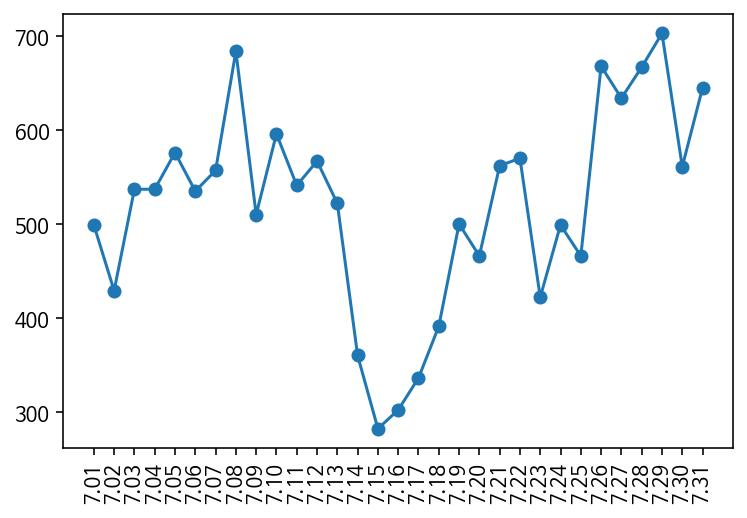

In [419]:
# 7.01~7.31 숫자 생성 후 반 올림
major_ticks = list(np.round(np.linspace(7.01,7.31, 31),2)) 

july = (day_by_day_df['date'] >= 7) & (day_by_day_df['date'] < 8) # 7월만 불러오는 index
plt.plot(major_ticks,
         day_by_day_df['date'].loc[july].value_counts().sort_index(), marker='o')
plt.xticks(major_ticks,rotation=90)
plt.show()

### 1.3.3. 시간 변수

In [369]:
# 시간 변수를 생성하는 함수 정의
def lag_function(df, var_name, past):
    # df = 시간변수를 생성할 데이터 프레임
    # var_name = 시간변수 생성의 대상이 되는 변수 이름
    # past = 몇 년 전의 성적을 생성할지 결정 (정수형)
    df.reset_index(drop=True, inplace = True)
    
    #시간변수 생성
    df['lag'+str(past)+'_'+var_name] = np.nan
    df['lag'+str(past)+'_'+'AB'] = np.nan
    
    for col in ['AB', var_name]:
        for i in range(0,(max(df.index)+1)):
            val = df.loc[(df['batter_name'] == df['batter_name'][i]) & 
                         (df['year'] == df['year'][i] - past), col]
            # 과거 기록이 결측치가 아니라면 값을 넣기
            if(len(val) != 0):
                df.loc[i, 'lag' + str(past) + '_' + col] = val.iloc[0]

    #30타수 미만 결측치 처리
    df.loc[df['lag' + str(past) + '_' + 'AB'] < 30, 
           'lag' + str(past) + '_' + var_name] = np.nan
    df.drop('lag' + str(past) + '_' + 'AB', axis = 1, inplace = True)

    return df

In [420]:
# 상관관계를 탐색할 변수 선택
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numeric_cols = list(regular_season_df.select_dtypes(include=numerics).drop(
    ['batter_id','year','OPS','SLG'], axis =1).columns)
regular_season_temp = regular_season_df[numeric_cols + ['year', 'batter_name']].copy()
regular_season_temp = regular_season_temp.loc[regular_season_temp['AB'] >= 30]
regular_season_temp.head()

,avg,G,AB,R,H,2B,3B,HR,TB,RBI,SB,CS,BB,HBP,SO,GDP,OBP,E,starting_salary,weight,height,weight_per_height,SF,SF_1,age,year,batter_name
0,0.339,50,183,27,62,9,0,8,95,34,5,0,9,8,25,3,0.383,9,0.0,93.0,177.0,0.525424,6.0,0.032787,33,2018,가르시아
2,0.221,41,86,11,19,2,3,1,30,7,0,0,13,2,28,1,0.337,6,10000.0,72.0,180.0,0.400000,-0.0,-0.000000,22,2014,강경학
3,0.257,120,311,50,80,7,4,2,101,27,4,3,40,5,58,3,0.348,15,10000.0,72.0,180.0,0.400000,3.0,0.009646,23,2015,강경학
4,0.158,46,101,16,16,3,2,1,26,7,0,0,8,2,30,5,0.232,7,10000.0,72.0,180.0,0.400000,1.0,0.009901,24,2016,강경학
5,0.214,59,84,17,18,2,1,0,22,4,1,1,8,1,19,1,0.290,4,10000.0,72.0,180.0,0.400000,0.0,0.000000,25,2017,강경학


In [421]:
# 시간변수 생성 함수를 통한 지표별 1년 전 성적 추출
for col in numeric_cols:
    regular_season_temp = lag_function(regular_season_temp, col, 1)
regular_season_temp.head()

,avg,G,AB,R,H,2B,3B,HR,TB,RBI,SB,CS,BB,HBP,SO,GDP,OBP,E,starting_salary,weight,height,weight_per_height,SF,SF_1,age,year,batter_name,lag1_avg,lag1_G,lag1_R,lag1_H,lag1_2B,lag1_3B,lag1_HR,lag1_TB,lag1_RBI,lag1_SB,lag1_CS,lag1_BB,lag1_HBP,lag1_SO,lag1_GDP,lag1_OBP,lag1_E,lag1_starting_salary,lag1_weight,lag1_height,lag1_weight_per_height,lag1_SF,lag1_SF_1,lag1_age
0,0.339,50,183,27,62,9,0,8,95,34,5,0,9,8,25,3,0.383,9,0.0,93.0,177.0,0.525424,6.0,0.032787,33,2018,가르시아,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.221,41,86,11,19,2,3,1,30,7,0,0,13,2,28,1,0.337,6,10000.0,72.0,180.0,0.400000,-0.0,-0.000000,22,2014,강경학,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.257,120,311,50,80,7,4,2,101,27,4,3,40,5,58,3,0.348,15,10000.0,72.0,180.0,0.400000,3.0,0.009646,23,2015,강경학,0.221,41.0,11.0,19.0,2.0,3.0,1.0,30.0,7.0,0.0,0.0,13.0,2.0,28.0,1.0,0.337,6.0,10000.0,72.0,180.0,0.4,-0.0,-0.000000,22.0
3,0.158,46,101,16,16,3,2,1,26,7,0,0,8,2,30,5,0.232,7,10000.0,72.0,180.0,0.400000,1.0,0.009901,24,2016,강경학,0.257,120.0,50.0,80.0,7.0,4.0,2.0,101.0,27.0,4.0,3.0,40.0,5.0,58.0,3.0,0.348,15.0,10000.0,72.0,180.0,0.4,3.0,0.009646,23.0
4,0.214,59,84,17,18,2,1,0,22,4,1,1,8,1,19,1,0.290,4,10000.0,72.0,180.0,0.400000,0.0,0.000000,25,2017,강경학,0.158,46.0,16.0,16.0,3.0,2.0,1.0,26.0,7.0,0.0,0.0,8.0,2.0,30.0,5.0,0.232,7.0,10000.0,72.0,180.0,0.4,1.0,0.009901,24.0


In [422]:
numeric_cols.remove('OBP')
regular_season_temp.drop(numeric_cols, axis = 1, inplace= True)
regular_season_temp.head()

,OBP,year,batter_name,lag1_avg,lag1_G,lag1_R,lag1_H,lag1_2B,lag1_3B,lag1_HR,lag1_TB,lag1_RBI,lag1_SB,lag1_CS,lag1_BB,lag1_HBP,lag1_SO,lag1_GDP,lag1_OBP,lag1_E,lag1_starting_salary,lag1_weight,lag1_height,lag1_weight_per_height,lag1_SF,lag1_SF_1,lag1_age
0,0.383,2018,가르시아,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.337,2014,강경학,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.348,2015,강경학,0.221,41.0,11.0,19.0,2.0,3.0,1.0,30.0,7.0,0.0,0.0,13.0,2.0,28.0,1.0,0.337,6.0,10000.0,72.0,180.0,0.4,-0.0,-0.000000,22.0
3,0.232,2016,강경학,0.257,120.0,50.0,80.0,7.0,4.0,2.0,101.0,27.0,4.0,3.0,40.0,5.0,58.0,3.0,0.348,15.0,10000.0,72.0,180.0,0.4,3.0,0.009646,23.0
4,0.290,2017,강경학,0.158,46.0,16.0,16.0,3.0,2.0,1.0,26.0,7.0,0.0,0.0,8.0,2.0,30.0,5.0,0.232,7.0,10000.0,72.0,180.0,0.4,1.0,0.009901,24.0


In [423]:
# 상관관계 도출
corr_matrix = regular_season_temp.corr()
corr_matrix = corr_matrix.sort_values(by = 'OBP', axis = 0, ascending=False)
corr_matrix = corr_matrix[corr_matrix.index]
corr_matrix.head()

,OBP,lag1_BB,lag1_TB,lag1_RBI,lag1_OBP,lag1_R,lag1_H,lag1_HR,lag1_2B,lag1_avg,lag1_GDP,lag1_G,lag1_SO,lag1_HBP,lag1_SF,lag1_CS,lag1_SB,lag1_weight,lag1_weight_per_height,lag1_SF_1,lag1_3B,lag1_height,lag1_starting_salary,year,lag1_age,lag1_E
OBP,1.000000,0.522357,0.492322,0.483260,0.475187,0.471261,0.467290,0.438914,0.437424,0.392883,0.345614,0.320889,0.297478,0.282853,0.276126,0.187070,0.162061,0.159897,0.159335,0.138850,0.135085,0.131954,0.114010,0.091312,0.085805,0.076340
lag1_BB,0.522357,1.000000,0.847957,0.817842,0.720749,0.840939,0.837736,0.678134,0.761681,0.564350,0.617758,0.736380,0.686510,0.463347,0.448943,0.396789,0.348989,0.151227,0.151269,0.169481,0.301336,0.114199,0.123923,0.021930,0.172638,0.262976
lag1_TB,0.492322,0.847957,1.000000,0.946307,0.669201,0.934583,0.970614,0.823217,0.914382,0.698264,0.690936,0.820362,0.776649,0.534486,0.520862,0.415337,0.372171,0.204374,0.202654,0.195609,0.382030,0.168129,0.156495,0.037774,0.153832,0.351376
lag1_RBI,0.483260,0.817842,0.946307,1.000000,0.634334,0.837969,0.880140,0.879156,0.843655,0.630462,0.692962,0.750722,0.752583,0.516672,0.546616,0.253985,0.207298,0.206878,0.202196,0.241685,0.250337,0.148945,0.155114,0.068008,0.182141,0.307069
lag1_OBP,0.475187,0.720749,0.669201,0.634334,1.000000,0.644305,0.666251,0.526097,0.604611,0.876749,0.436015,0.459456,0.403766,0.415596,0.316307,0.257614,0.231411,0.128148,0.127580,0.119261,0.223587,0.099787,0.095838,0.125613,0.212940,0.117912


Text(0.5, 1.0, 'Diagonal Correlation HeatMap')

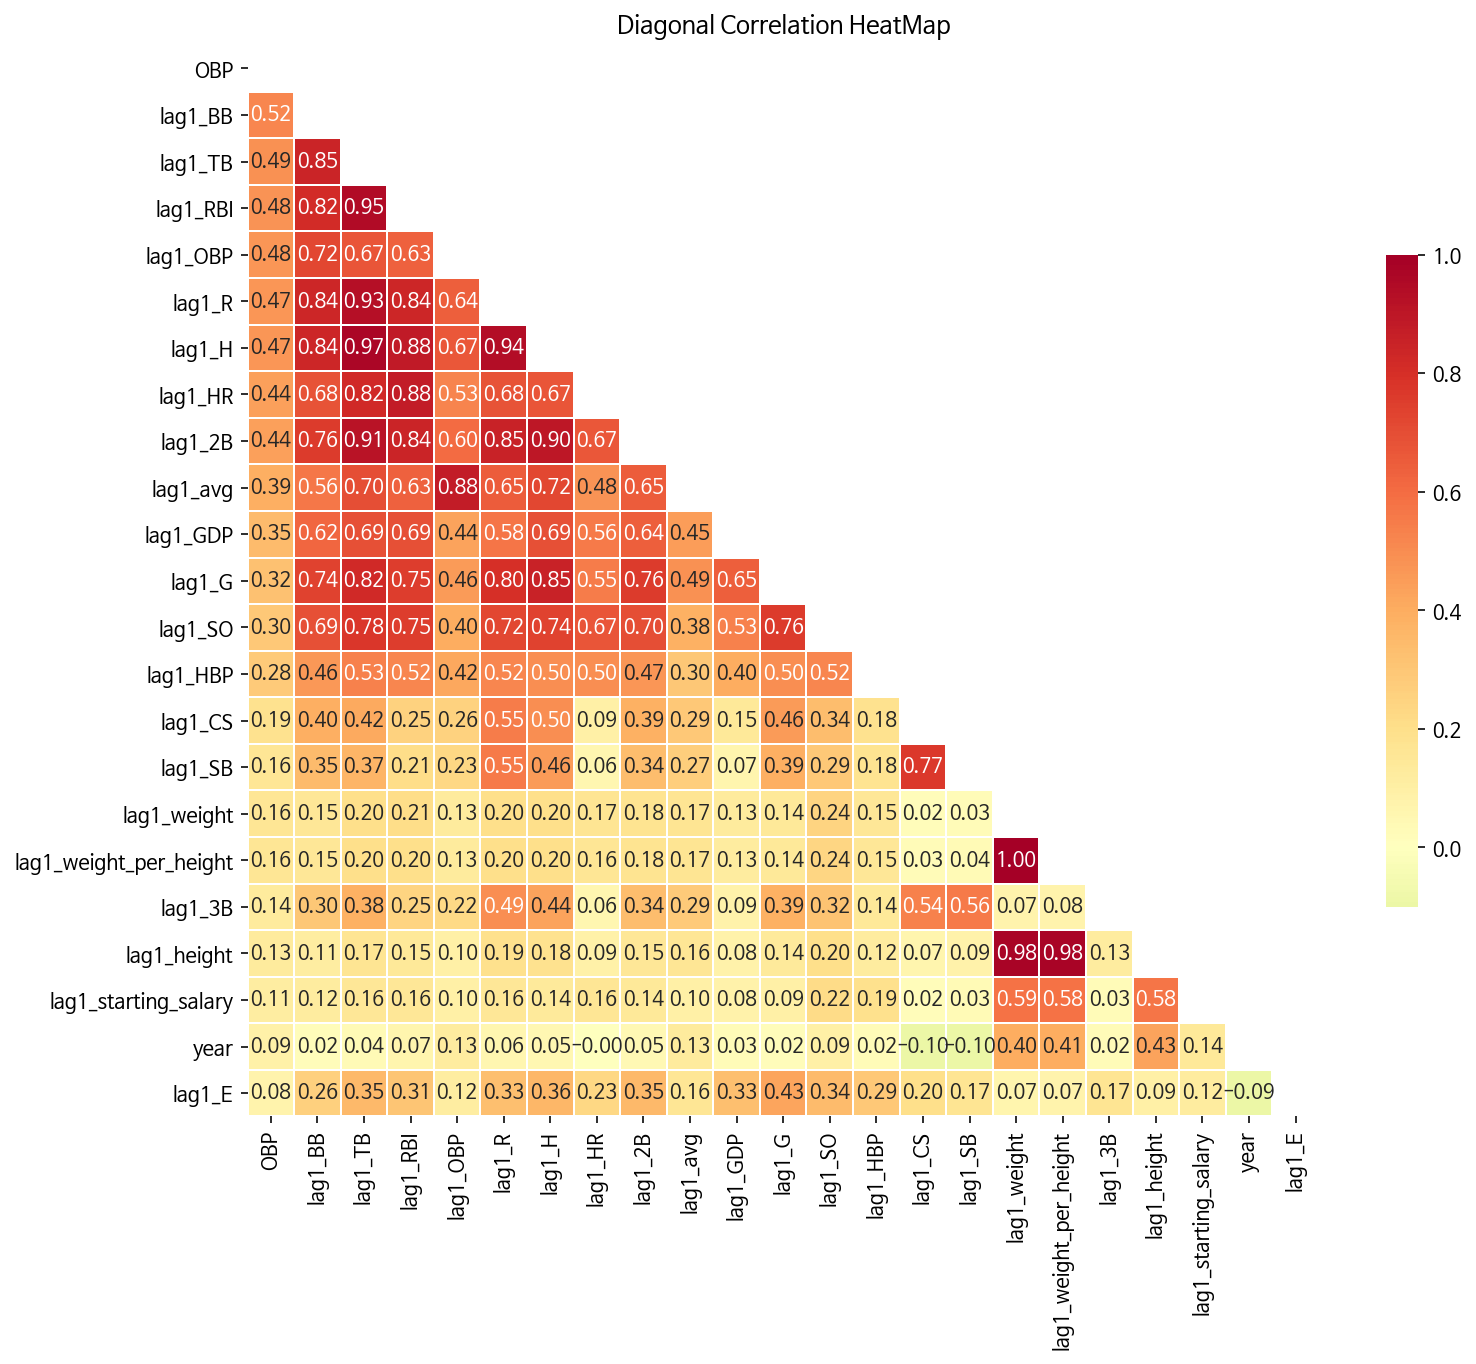

In [374]:
# 상관관계의 시각적 표현
f, ax = plt.subplots(figsize=(12, 12))
corr = regular_season_temp.select_dtypes(exclude=["object","bool"]).corr()

# 대각 행렬을 기준으로 한 쪽만 나타나게 설정해줍니다.
mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

g = sns.heatmap(corr_matrix, cmap='RdYlGn_r', vmax= 1, mask=mask, 
center=0, annot=True, fmt='.2f', square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title("Diagonal Correlation HeatMap")

In [424]:
#희생 플라이 구하기
#OBP(출루율) 계산 공식 이용하여 SF(희생 플라이)계산 >> (H+BB+HBP)/OBP-(AB+BB+HBP)
regular_season_df['SF'] = regular_season_df[['H','BB','HBP']].sum(axis=1) / regular_season_df['OBP'] - regular_season_df[['AB','BB','HBP']].sum(axis=1)
regular_season_df['SF'].fillna(0, inplace = True)
regular_season_df['SF'] = regular_season_df['SF'].apply(lambda x : round(x,0))
regular_season_df.head()

,batter_id,batter_name,year,team,avg,G,AB,R,H,2B,3B,HR,TB,RBI,SB,CS,BB,HBP,SO,GDP,SLG,OBP,E,height/weight,year_born,position,career,starting_salary,OPS,weight,height,weight_per_height,pos,hit_way,country,SF,SF_1,age
0,0,가르시아,2018,LG,0.339,50,183,27,62,9,0,8,95,34,5,0,9,8,25,3,0.519,0.383,9,177cm/93kg,1985년 04월 12일,내야수(우투우타),쿠바 Ciego de Avila Maximo Gomez Baez(대),0.0,0.902,93.0,177.0,0.525424,내야수,우타,foreign,6.0,0.032787,33
1,1,강경학,2011,한화,0.000,2,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0.000,0.000,1,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000.0,0.000,72.0,180.0,0.400000,내야수,좌타,korean,0.0,0.000000,19
2,1,강경학,2014,한화,0.221,41,86,11,19,2,3,1,30,7,0,0,13,2,28,1,0.349,0.337,6,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000.0,0.686,72.0,180.0,0.400000,내야수,좌타,korean,-0.0,-0.000000,22
3,1,강경학,2015,한화,0.257,120,311,50,80,7,4,2,101,27,4,3,40,5,58,3,0.325,0.348,15,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000.0,0.673,72.0,180.0,0.400000,내야수,좌타,korean,3.0,0.009646,23
4,1,강경학,2016,한화,0.158,46,101,16,16,3,2,1,26,7,0,0,8,2,30,5,0.257,0.232,7,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000.0,0.489,72.0,180.0,0.400000,내야수,좌타,korean,1.0,0.009901,24


In [425]:
#한 타수당 평균 희생 플라이 계산 후 필요한 것만 추출
regular_season_df['SF_1'] = regular_season_df['SF'] / regular_season_df['AB']
regular_season_df_SF = regular_season_df[['batter_name','year','SF_1']]
regular_season_df_SF.head()

,batter_name,year,SF_1
0,가르시아,2018,0.032787
1,강경학,2011,0.000000
2,강경학,2014,-0.000000
3,강경학,2015,0.009646
4,강경학,2016,0.009901


In [442]:
#day_by_day에서 연도별 선수의 시즌 전반기 출루율과 관련된 성적 합 구하기
sum_hf_yr_OBP = day_by_day_df.loc[day_by_day_df['date'] <= 7.18].groupby(['batter_name','year'])['AB','H','BB','HBP'].sum().reset_index()
sum_hf_yr_OBP.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,batter_name,year,AB,H,BB,HBP
0,가르시아,2018,85,31,6,4
1,강경학,2011,1,0,0,0
2,강경학,2014,0,0,2,0
3,강경학,2015,156,39,21,2
4,강경학,2016,81,12,6,2


In [443]:
#day_by_day와 regular season에서 구한 희생 플라이 관련 데이터를 합치기
sum_hf_yr_OBP = sum_hf_yr_OBP.merge(regular_season_df_SF, how = 'left', on=['batter_name','year'])
sum_hf_yr_OBP.head()

,batter_name,year,AB,H,BB,HBP,SF_1
0,가르시아,2018,85,31,6,4,0.032787
1,강경학,2011,1,0,0,0,0.000000
2,강경학,2014,0,0,2,0,-0.000000
3,강경학,2015,156,39,21,2,0.009646
4,강경학,2016,81,12,6,2,0.009901


In [444]:
#선수별 전반기 희생 플라이 수 계산
sum_hf_yr_OBP['SF'] = (sum_hf_yr_OBP['SF_1']*sum_hf_yr_OBP['AB']).apply(lambda x: round(x, 0))
sum_hf_yr_OBP.drop('SF_1', axis = 1, inplace = True)

sum_hf_yr_OBP.head()

,batter_name,year,AB,H,BB,HBP,SF
0,가르시아,2018,85,31,6,4,3.0
1,강경학,2011,1,0,0,0,0.0
2,강경학,2014,0,0,2,0,-0.0
3,강경학,2015,156,39,21,2,2.0
4,강경학,2016,81,12,6,2,1.0


In [445]:
#선수별 전반기 OBP(출루율) 계산
sum_hf_yr_OBP['OBP'] = sum_hf_yr_OBP[['H', 'BB', 'HBP']].sum(axis = 1) / sum_hf_yr_OBP[['AB', 'BB', 'HBP','SF']].sum(axis = 1)
# OBP 결측치를 0으로 처리 
sum_hf_yr_OBP['OBP'].fillna(0, inplace = True)
sum_hf_yr_OBP.head()

,batter_name,year,AB,H,BB,HBP,SF,OBP
0,가르시아,2018,85,31,6,4,3.0,0.418367
1,강경학,2011,1,0,0,0,0.0,0.000000
2,강경학,2014,0,0,2,0,-0.0,1.000000
3,강경학,2015,156,39,21,2,2.0,0.342541
4,강경학,2016,81,12,6,2,1.0,0.222222


In [446]:
# 분석에 필요하지 않은 열 제거
sum_hf_yr_OBP = sum_hf_yr_OBP[['batter_name','year','AB','OBP']]
sum_hf_yr_OBP.head()

,batter_name,year,AB,OBP
0,가르시아,2018,85,0.418367
1,강경학,2011,1,0.000000
2,강경학,2014,0,1.000000
3,강경학,2015,156,0.342541
4,강경학,2016,81,0.222222


### 1.3.4. 추가 변수 생성

In [447]:
# 나이 변수 생성
regular_season_df['age'] = regular_season_df['year'] - regular_season_df['year_born'].apply(lambda x: int(x[:4]))
regular_season_df['age'].head()

0    33
1    19
2    22
3    23
4    24
Name: age, dtype: int64

In [448]:
# 나이, 평균 출루율, 출루율 중위값으로 구성된 데이터프레임 구축
# 여러개의 함수를 여러 열에 적용 : agg()
temp_df = regular_season_df.loc[regular_season_df['AB'] >= 30].groupby('age').agg( {'OBP':['mean','median']}).reset_index()
temp_df.head()

age       OBP        
           mean  median
0  18  0.295750  0.3140
1  19  0.296261  0.2955
2  20  0.309184  0.3270
3  21  0.320382  0.3205
4  22  0.327844  0.3230

In [449]:
temp_df.columns = temp_df.columns.droplevel()
temp_df.columns = ['age', 'mean_OBP', 'median_OBP']
temp_df.head()

,age,mean_OBP,median_OBP
0,18,0.295750,0.3140
1,19,0.296261,0.2955
2,20,0.309184,0.3270
3,21,0.320382,0.3205
4,22,0.327844,0.3230


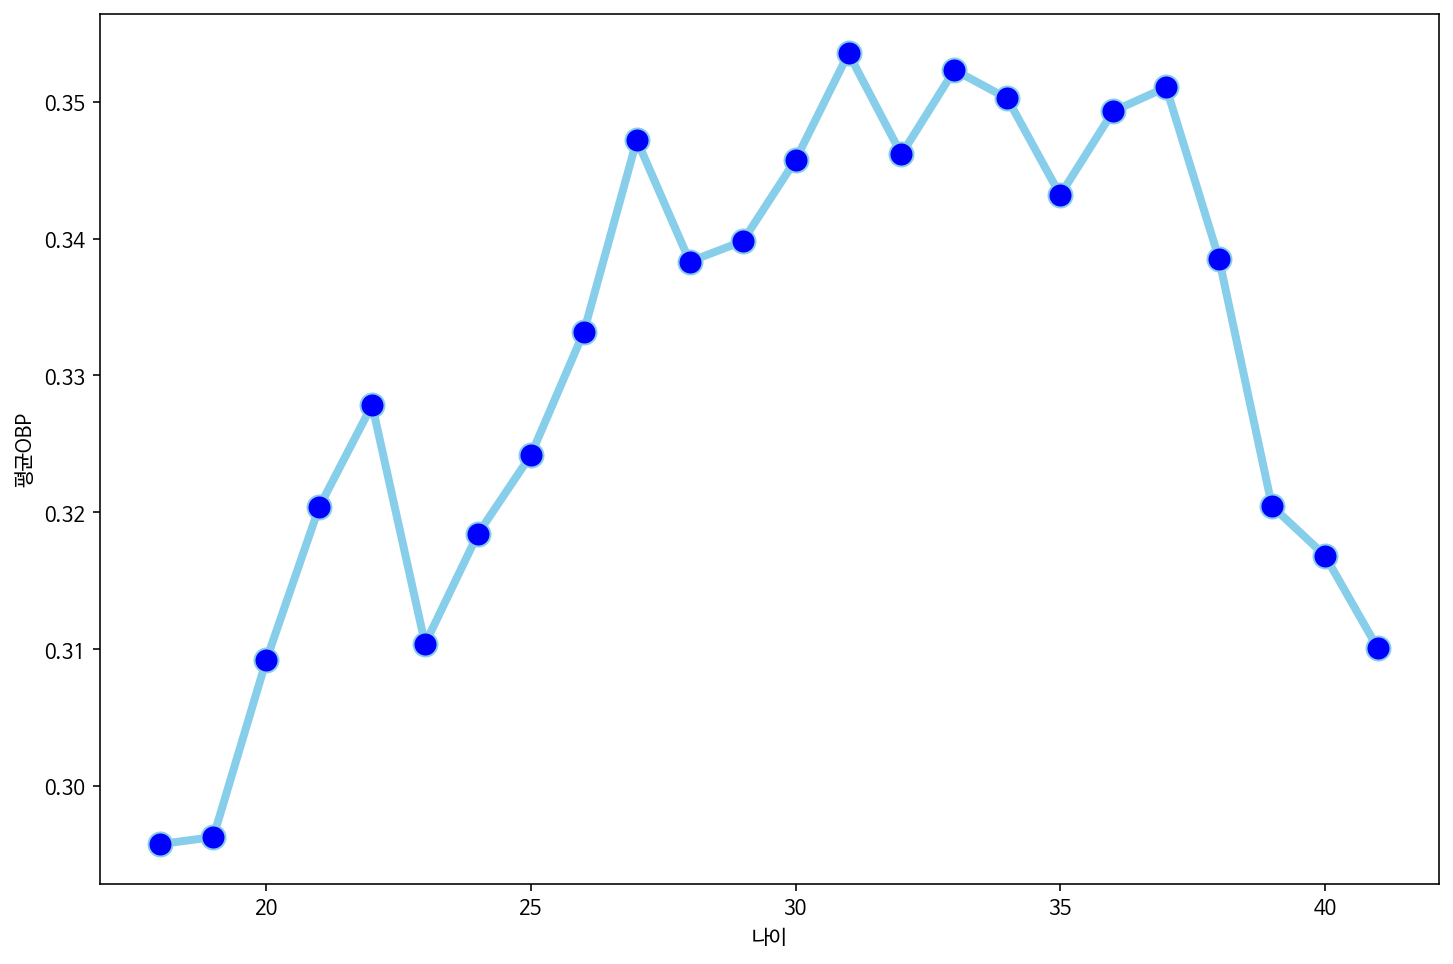

In [450]:
# 나이에 따른 출루율 추이 시각화
plt.figure(figsize=(12,8))
plt.plot('age', 'mean_OBP', data=temp_df, marker='o', markerfacecolor='blue',
         markersize=12, color='skyblue', linewidth=4)
plt.ylabel('평균OBP')
plt.xlabel('나이')
plt.show()

In [451]:
# 나이를 포함한 변수 선택
sum_hf_yr_OBP = sum_hf_yr_OBP.merge(regular_season_df[['batter_name','year','age']],
                                    how = 'left', on=['batter_name','year'])

# 총 3년 전 성적까지 변수를 생성
sum_hf_yr_OBP = lag_function(sum_hf_yr_OBP, "OBP", 1)
sum_hf_yr_OBP = lag_function(sum_hf_yr_OBP, "OBP", 2)
sum_hf_yr_OBP = lag_function(sum_hf_yr_OBP, "OBP", 3)
sum_hf_yr_OBP.head(8)

,batter_name,year,AB,OBP,age,lag1_OBP,lag2_OBP,lag3_OBP
0,가르시아,2018,85,0.418367,33,NaN,NaN,NaN
1,강경학,2011,1,0.000000,19,NaN,NaN,NaN
2,강경학,2014,0,1.000000,22,NaN,NaN,NaN
3,강경학,2015,156,0.342541,23,NaN,NaN,NaN
4,강경학,2016,81,0.222222,24,0.342541,NaN,NaN
5,강경학,2017,82,0.285714,25,0.222222,0.342541,NaN
6,강경학,2018,126,0.423611,26,0.285714,0.222222,0.342541
7,강구성,2016,2,0.000000,23,NaN,NaN,NaN


### 1.3.5. 데이터 사후 처리

In [452]:
round(sum_hf_yr_OBP[['lag1_OBP','lag2_OBP','lag3_OBP']].isna().sum() / sum_hf_yr_OBP.shape[0], 2)

lag1_OBP    0.41
lag2_OBP    0.54
lag3_OBP    0.61
dtype: float64

In [453]:
#1. 선수별 OBP 평균
# SF = (H+BB+HBP) / OBP-(AB+BB+HBP)
# OBP = (H+BB+HBP) / (AB+BB+HBP+SF)
player_OBP_mean = regular_season_df.loc[regular_season_df['AB'] >= 30].groupby('batter_name')['AB','H','BB','HBP','SF'].sum().reset_index()
player_OBP_mean['mean_OBP'] = player_OBP_mean[['H', 'BB', 'HBP']].sum(axis=1) / player_OBP_mean[['AB','BB','HBP','SF']].sum(axis=1)
player_OBP_mean.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  after removing the cwd from sys.path.


,batter_name,AB,H,BB,HBP,SF,mean_OBP
0,가르시아,183,62,9,8,6.0,0.383495
1,강경학,827,201,107,14,5.0,0.337880
2,강민호,5275,1460,569,128,50.0,0.358187
3,강백호,527,153,52,3,2.0,0.356164
4,강병식,1288,305,163,32,0.0,0.337154


In [454]:
#2. 시즌별 OBP 평균
season_OBP_mean = regular_season_df.loc[regular_season_df['AB'] >= 30].groupby('year')['AB','H','BB','HBP','SF'].sum().reset_index()
season_OBP_mean['mean_OBP'] = season_OBP_mean[['H', 'BB', 'HBP']].sum(axis=1) / season_OBP_mean[['AB','BB','HBP','SF']].sum(axis=1)
season_OBP_mean = season_OBP_mean[['year', 'mean_OBP']]
season_OBP_mean.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,year,mean_OBP
0,1993,0.333333
1,1994,0.455036
2,1995,0.401487
3,1996,0.361559
4,1997,0.349791


In [455]:
#### player_OBP_mean(선수평균) 열 추가
sum_hf_yr_OBP = sum_hf_yr_OBP.merge(player_OBP_mean[['batter_name', 'mean_OBP']], how ='left', on="batter_name")
# 물결 표시(~)는 판다스를 색인할 때 True를 False로, False를 True로 바꿔줌.
sum_hf_yr_OBP = sum_hf_yr_OBP.loc[~sum_hf_yr_OBP['mean_OBP'].isna()].reset_index(drop=True)
sum_hf_yr_OBP.head()

,batter_name,year,AB,OBP,age,lag1_OBP,lag2_OBP,lag3_OBP,mean_OBP
0,가르시아,2018,85,0.418367,33,NaN,NaN,NaN,0.383495
1,강경학,2011,1,0.000000,19,NaN,NaN,NaN,0.337880
2,강경학,2014,0,1.000000,22,NaN,NaN,NaN,0.337880
3,강경학,2015,156,0.342541,23,NaN,NaN,NaN,0.337880
4,강경학,2016,81,0.222222,24,0.342541,NaN,NaN,0.337880


In [456]:
# 결측치 처리하는 함수 정의
def lag_na_fill(data_set, var_name, past, season_var_mean_data):
    # data_Set: 이용할 데이터셋
    # var_name: 시간 변수를 만들 변수 이름
    # past: 몇 년 전 변수를 만들지 결정
    # season_var_name_mean_data season별로 var_name의 평균을 구한 데이터
  
    for i in range(0,len(data_set)):
        if np.isnan(data_set["lag"+str(past)+"_"+var_name][i]):
            data_set.loc[i,["lag"+str(past)+"_"+var_name]] = (
                data_set["mean" + "_" + var_name][i] + season_var_mean_data.loc[
                    season_var_mean_data['year'] == (data_set['year'][i] - past),
                    "mean_" + var_name].iloc[0]) / 2
    return data_set

In [457]:
# 생성한 함수를 이용해 결측치 처리 진행
sum_hf_yr_OBP = lag_na_fill(sum_hf_yr_OBP, "OBP", 1, season_OBP_mean) # 1년 전 성적 대체
sum_hf_yr_OBP = lag_na_fill(sum_hf_yr_OBP, "OBP", 2, season_OBP_mean) # 2년 전 성적 대체
sum_hf_yr_OBP = lag_na_fill(sum_hf_yr_OBP, "OBP", 3, season_OBP_mean) # 3년 전 성적 대체
sum_hf_yr_OBP.head()

,batter_name,year,AB,OBP,age,lag1_OBP,lag2_OBP,lag3_OBP,mean_OBP
0,가르시아,2018,85,0.418367,33,0.369982,0.375910,0.373119,0.383495
1,강경학,2011,1,0.000000,19,0.347434,0.348603,0.344259,0.337880
2,강경학,2014,0,1.000000,22,0.346682,0.337511,0.343131,0.337880
3,강경학,2015,156,0.342541,23,0.353425,0.346682,0.337511,0.337880
4,강경학,2016,81,0.222222,24,0.342541,0.353425,0.346682,0.337880


### 1.3.6. SLG 데이터 전처리

Text(0.5, 1.0, 'Diagonal Correlation HeatMap')

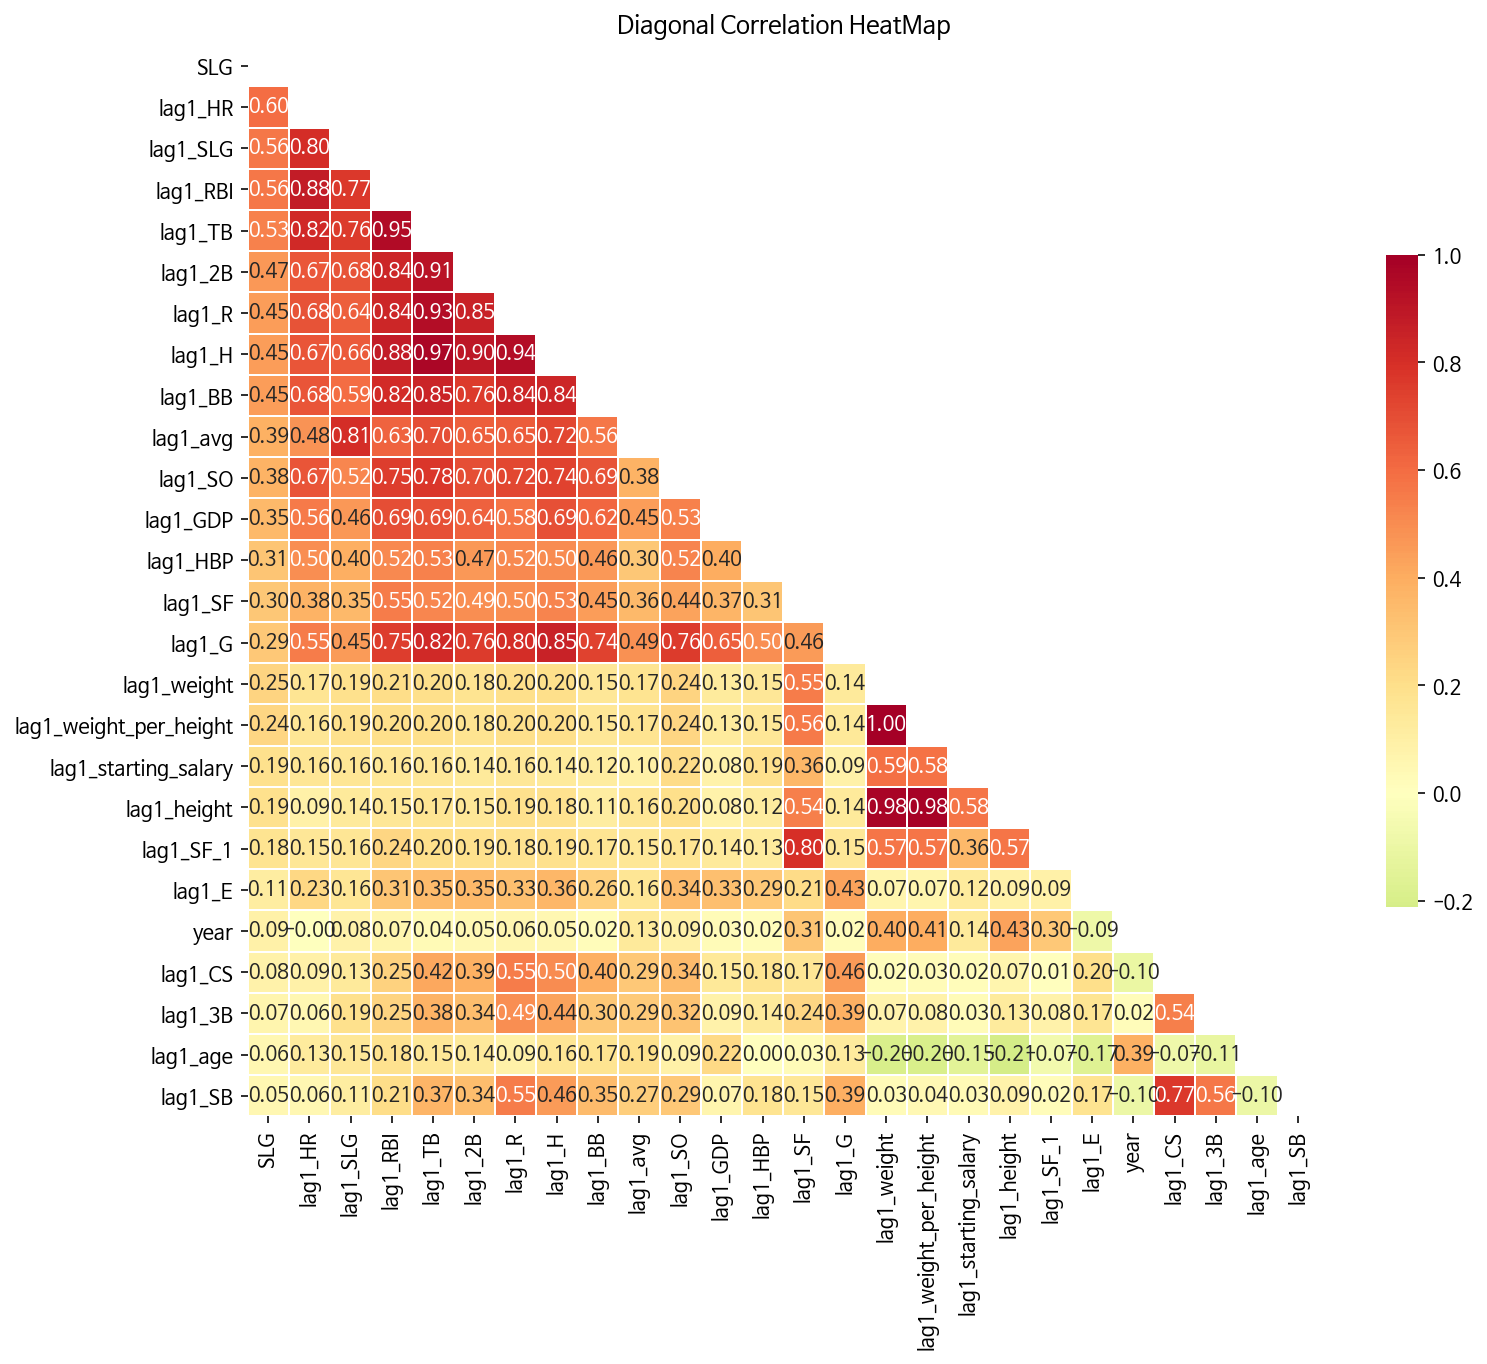

In [393]:
# 상관관계를 탐색할 변수 선택
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numeric_cols = list(regular_season_df.select_dtypes(include=numerics).drop(
    ['batter_id','year','OPS','OBP'], axis =1).columns)
regular_season_temp = regular_season_df[numeric_cols + ['year', 'batter_name']].copy()
regular_season_temp = regular_season_temp.loc[regular_season_temp['AB']>=30]

# 시간변수 생성 함수를 통한 지표별 1년 전 성적 추출
for col in numeric_cols:
    regular_season_temp = lag_function(regular_season_temp, col, 1)

numeric_cols.remove('SLG')
regular_season_temp.drop(numeric_cols, axis = 1, inplace=True)

# 상관관계 도출
corr_matrix = regular_season_temp.corr()
corr_matrix = corr_matrix.sort_values(by = 'SLG', axis = 0, ascending=False)
corr_matrix = corr_matrix[corr_matrix.index]

# 상관관계의 시각적 표현
f, ax = plt.subplots(figsize=(12, 12))
corr = regular_season_temp.select_dtypes(exclude=["object","bool"]).corr()

# 대각 행렬을 기준으로 한쪽만 나타나게 설정해줍니다.
mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

cmap = sns.diverging_palette(220, 10, as_cmap=True)
g = sns.heatmap(corr_matrix, cmap='RdYlGn_r', vmax=1, mask=mask, center=0, annot=True,
                fmt='.2f', square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title("Diagonal Correlation HeatMap")

In [438]:
# day_by_day에서 연도별 선수의 시즌 전반기 장타율(SLG)과 관련된 성적 합 구하기
sum_hf_yr_SLG = day_by_day_df.loc[day_by_day_df['date'] <= 7.18].groupby(
    ['batter_name','year'])['AB','H','2B','3B', 'HR'].sum().reset_index()

# 전반기 장타율 계산
sum_hf_yr_SLG['SLG'] =  (sum_hf_yr_SLG['H'] - sum_hf_yr_SLG[['2B', '3B', 'HR']].sum(axis=1) +
                         sum_hf_yr_SLG['2B']*2 + sum_hf_yr_SLG['3B']*3 + sum_hf_yr_SLG['HR']*4) / sum_hf_yr_SLG['AB']

# SLG 결측치를 0으로 처리 
sum_hf_yr_SLG['SLG'].fillna(0, inplace=True)

# 필요한 칼럼만 불러오고 나이 계산
sum_hf_yr_SLG = sum_hf_yr_SLG[['batter_name','year','AB','SLG']]
sum_hf_yr_SLG = sum_hf_yr_SLG.merge(regular_season_df[['batter_name','year','age']],
                                    how='left', on=['batter_name','year'])
sum_hf_yr_SLG.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


,batter_name,year,AB,SLG,age
0,가르시아,2018,85,0.552941,33
1,강경학,2011,1,0.000000,19
2,강경학,2014,0,0.000000,22
3,강경학,2015,156,0.333333,23
4,강경학,2016,81,0.222222,24


In [439]:
# 총 3년 전 성적까지 변수를 생성
sum_hf_yr_SLG = lag_function(sum_hf_yr_SLG, "SLG", 1)
sum_hf_yr_SLG = lag_function(sum_hf_yr_SLG, "SLG", 2)
sum_hf_yr_SLG = lag_function(sum_hf_yr_SLG, "SLG", 3)
display(sum_hf_yr_SLG.head())

round(sum_hf_yr_SLG[['lag1_SLG', 'lag2_SLG', 'lag3_SLG']].isna().sum()/
      sum_hf_yr_SLG.shape[0], 2)

,batter_name,year,AB,SLG,age,lag1_SLG,lag2_SLG,lag3_SLG
0,가르시아,2018,85,0.552941,33,NaN,NaN,NaN
1,강경학,2011,1,0.000000,19,NaN,NaN,NaN
2,강경학,2014,0,0.000000,22,NaN,NaN,NaN
3,강경학,2015,156,0.333333,23,NaN,NaN,NaN
4,강경학,2016,81,0.222222,24,0.333333,NaN,NaN


lag1_SLG    0.41
lag2_SLG    0.54
lag3_SLG    0.61
dtype: float64

In [440]:
# 선수별 SLG 평균 데이터(player_SLG_mean)를 만듭니다
player_SLG_mean = regular_season_df.loc[regular_season_df['AB'] >= 30].groupby(
    'batter_name')['AB','H','2B','3B','HR'].sum().reset_index()
player_SLG_mean['mean_SLG'] = (player_SLG_mean['H'] - player_SLG_mean[['2B','3B','HR']].sum(axis = 1) +
                               player_SLG_mean['2B']*2 + player_SLG_mean['3B']*3 + player_SLG_mean['HR']*4) / player_SLG_mean['AB']

# 시즌별 SLG 평균 데이터(season_SLG_mean)를 만듭니다
season_SLG_mean = regular_season_df.loc[regular_season_df['AB'] >= 30].groupby(
    'year')['AB','H','2B','3B','HR'].sum().reset_index()
season_SLG_mean['mean_SLG'] = (season_SLG_mean['H'] - season_SLG_mean[['2B','3B','HR']].sum(axis = 1) + 
                               season_SLG_mean['2B']*2 + season_SLG_mean['3B']*3 + season_SLG_mean['HR']*4) / season_SLG_mean['AB']

# 선수 평균의 SLG(player_OBP_mean)를 새로운 변수로 더합니다.
sum_hf_yr_SLG = sum_hf_yr_SLG.merge(player_SLG_mean[['batter_name', 'mean_SLG']],
                                    how='left', on="batter_name")

# 선수 평균의 성적이 결측치이면 데이터에서 제거합니다.
sum_hf_yr_SLG = sum_hf_yr_SLG.loc[~sum_hf_yr_SLG['mean_SLG'].isna()].reset_index(drop=True)

# 결측치 처리
sum_hf_yr_SLG = lag_na_fill(sum_hf_yr_SLG, "SLG", 1, season_SLG_mean) #1년전 성적 대체
sum_hf_yr_SLG = lag_na_fill(sum_hf_yr_SLG, "SLG", 2, season_SLG_mean) #2년전 성적 대체
sum_hf_yr_SLG = lag_na_fill(sum_hf_yr_SLG, "SLG", 3, season_SLG_mean) #3년전 성적 대체

display(sum_hf_yr_SLG.head())
round(sum_hf_yr_SLG[['lag1_SLG', 'lag2_SLG', 'lag3_SLG']].isna().sum()/sum_hf_yr_SLG.shape[0], 2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  if __name__ == '__main__':


,batter_name,year,AB,SLG,age,lag1_SLG,lag2_SLG,lag3_SLG,mean_SLG
0,가르시아,2018,85,0.552941,33,0.481855,0.481498,0.476627,0.519126
1,강경학,2011,1,0.000000,19,0.372902,0.380882,0.361716,0.332527
2,강경학,2014,0,0.000000,22,0.362931,0.349344,0.359616,0.332527
3,강경학,2015,156,0.333333,23,0.389415,0.362931,0.349344,0.332527
4,강경학,2016,81,0.222222,24,0.333333,0.389415,0.362931,0.332527


lag1_SLG    0.0
lag2_SLG    0.0
lag3_SLG    0.0
dtype: float64

## 1.4. 모델링
### 1.4.1. 데이터 분할

In [458]:
# 30타수 이상의 데이터만 학습
sum_hf_yr_OBP= sum_hf_yr_OBP.loc[sum_hf_yr_OBP['AB']>=30]
sum_hf_yr_SLG = sum_hf_yr_SLG.loc[sum_hf_yr_SLG['AB']>=30] 

# 2018년 데이터를 test 데이터 2018년 이전은 train 데이터로 나눈다.
OBP_train = sum_hf_yr_OBP.loc[sum_hf_yr_OBP['year'] != 2018]
OBP_test = sum_hf_yr_OBP.loc[sum_hf_yr_OBP['year'] == 2018]

SLG_train = sum_hf_yr_SLG.loc[sum_hf_yr_SLG['year'] != 2018]
SLG_test = sum_hf_yr_SLG.loc[sum_hf_yr_SLG['year'] == 2018]
print(OBP_train.shape, OBP_test.shape, SLG_train.shape, SLG_test.shape)

(872, 9) (150, 9) (872, 9) (150, 9)


In [459]:
def wrmse(v,w,p):
    # v: 실제값
    # w: 타수
    # p: 예측값
    return sum(np.sqrt(((v-p)**2 * w) / sum(w)))

### 1.4.2. 모델 선택

function ClickConnect(){   
    console.log("Session Timeout 방지");    
    document.querySelector("colab-toolbar-button#connect").click()    
}   
setInterval(ClickConnect, 60 * 1000)   

회귀트리: https://jeonsm9575.tistory.com/42

In [460]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV

# log 단위(1e+01)로 1.e-04 ~ 1.e+01 사이의 구간에 대해 parameter를 탐색한다. 
lasso_params = {'alpha':np.logspace(-4, 1, 6)} 
ridge_params = {'alpha':np.logspace(-4, 1, 6)} 

# GridSearchCV를 이용하여 dict에 Lasso, Ridege OBP 모델을 저장한다.
OBP_linear_models = {
    'Lasso': GridSearchCV(Lasso(), param_grid=lasso_params).fit(
        OBP_train.iloc[:,-5:], OBP_train['OBP']).best_estimator_,
    'Ridge': GridSearchCV(Ridge(), param_grid=ridge_params).fit(
        OBP_train.iloc[:,-5:], OBP_train['OBP']).best_estimator_,}

# GridSearchCV를 이용하여 dict에 Lasso, Ridge SLG 모델을 저장한다
SLG_linear_models = {
    'Lasso': GridSearchCV(Lasso(), param_grid=lasso_params).fit(
        SLG_train.iloc[:,-5:], SLG_train['SLG']).best_estimator_,
    'Ridge': GridSearchCV(Ridge(),param_grid=ridge_params).fit(
        SLG_train.iloc[:,-5:], SLG_train['SLG']).best_estimator_,}

In [461]:
import time
from sklearn.ensemble import RandomForestRegressor 
start = time.time() # 시작 시간 저장

# 랜덤 포레스트의 parameter 범위를 정의한다.
RF_params = {
    'n_estimators': [50,100,150,200,300,500,1000],
    'max_features': ['auto', 'sqrt'],
    'max_depth' : [1,2,3,5,6,10],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 3, 5, 10]}

# GridSearchCV를 이용하여 dict에 OBP Randomforest 모델을 저장한다.
OBP_RF_models = {
    'RF': GridSearchCV(
        RandomForestRegressor(random_state=42), param_grid=RF_params, n_jobs= -1
        ).fit(OBP_train.iloc[:,-5:], OBP_train['OBP']).best_estimator_}
print(f"걸린시간 : {np.round(time.time() - start,3)}초") # 현재시간 – 시작시간(단위 초)

걸린시간 : 1265.339초


In [462]:
start = time.time() # 시작 시간 저장
# GridSearchCV를 이용하여 dict에 OBP Randomforest 모델을 저장한다.
SLG_RF_models = {
    'RF': GridSearchCV(
        RandomForestRegressor(random_state=42), param_grid=RF_params, n_jobs= 1,
        ).fit(SLG_train.iloc[:,-5:], SLG_train['SLG']).best_estimator_}
print(f"걸린시간 : {np.round(time.time() - start,3)}초") # 현재시간 – 시작시간(단위 초)

걸린시간 : 2942.645초


In [479]:
import xgboost as xgb 
start = time.time() # 시작 시간 저장

# xgboost parmeter space를 정의한다.
XGB_params = {
    'min_child_weight': [1,3, 5,10],
    'gamma': [0.3,0.5, 1, 1.5, 2, 5],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'max_depth': [3, 4, 5,7,10]}
# GridSearchCV를 통해 parameter를 탐색하게 정의한다.
XGB_OBP_gridsearch = GridSearchCV(xgb.XGBRegressor(random_state=42), param_grid=XGB_params, n_jobs=-1) 
# 모델 학습
XGB_OBP_gridsearch.fit(OBP_train.iloc[:,-5:], OBP_train['OBP'])
print(f"걸린시간 : {np.round(time.time() - start,3)}초") # 현재시간 – 시작시간(단위 초)

[10:06:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
걸린시간 : 165.953초


In [480]:
start = time.time() # 시작 시간 저장

# GridSearchCV를 통해 parameter를 탐색하게 정의한다.
XGB_SLG_gridsearch = GridSearchCV(xgb.XGBRegressor(random_state=42),
    param_grid=XGB_params, n_jobs=-1)
# 모델 학습
XGB_SLG_gridsearch.fit(SLG_train.iloc[:,-5:], SLG_train['SLG'])

print(f"걸린시간 : {np.round(time.time() - start,3)}초") # 현재시간 – 시작시간(단위 초)

[10:09:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
걸린시간 : 164.579초


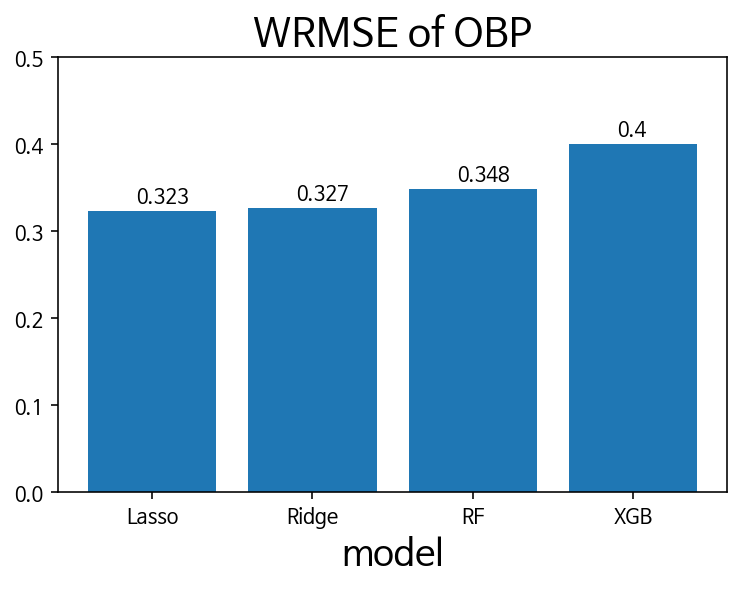

In [481]:
# 테스트 데이터셋(2018년)의 선수들의 OBP를 예측
Lasso_OBP = OBP_linear_models['Lasso'].predict(OBP_test.iloc[:,-5:])
Ridge_OBP = OBP_linear_models['Ridge'].predict(OBP_test.iloc[:,-5:])
RF_OBP = OBP_RF_models['RF'].predict(OBP_test.iloc[:,-5:])
XGB_OBP = XGB_OBP_gridsearch.predict(OBP_test.iloc[:,-5:])

# test 데이터의 WRMSE 계산
wrmse_score = [wrmse(OBP_test['OBP'], OBP_test['AB'], Lasso_OBP),
               wrmse(OBP_test['OBP'], OBP_test['AB'], Ridge_OBP),
               wrmse(OBP_test['OBP'], OBP_test['AB'], RF_OBP),
               wrmse(OBP_test['OBP'], OBP_test['AB'], XGB_OBP)]

x_lab = ['Lasso', 'Ridge', 'RF', 'XGB']

plt.bar(x_lab, wrmse_score)
plt.title('WRMSE of OBP', fontsize=20)
plt.xlabel('model', fontsize=18)
plt.ylabel('', fontsize=18)
plt.ylim(0,0.5)

# 막대그래프 위에 값을 표시해준다.
for i, v in enumerate(wrmse_score):
    plt.text(i-0.1, v + 0.01, str(np.round(v,3))) # x 좌표, y 좌표, 텍스트를 표현한다.
    
plt.show()

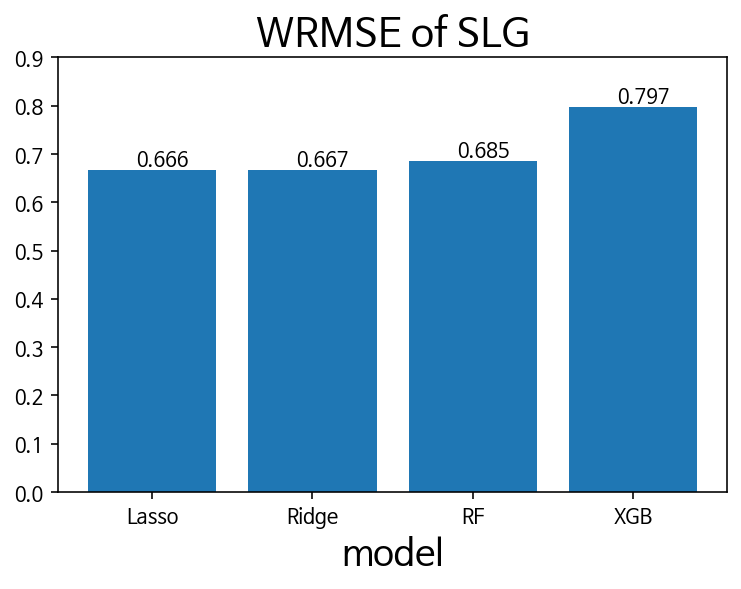

In [482]:
# 테스트 데이터셋(2018년)의 선수들의 SLG를 예측
Lasso_SLG = SLG_linear_models['Lasso'].predict(SLG_test.iloc[:,-5:])
Ridge_SLG = SLG_linear_models['Ridge'].predict(SLG_test.iloc[:,-5:])
RF_SLG = SLG_RF_models['RF'].predict(SLG_test.iloc[:,-5:])
XGB_SLG = XGB_SLG_gridsearch.predict(SLG_test.iloc[:,-5:])

# test데이터 WRMSE 계산
wrmse_score_SLG = [wrmse(SLG_test['SLG'], SLG_test['AB'], Lasso_SLG),
                   wrmse(SLG_test['SLG'], SLG_test['AB'], Ridge_SLG), 
                   wrmse(SLG_test['SLG'], SLG_test['AB'], RF_SLG),
                   wrmse(SLG_test['SLG'], SLG_test['AB'], XGB_SLG)]

x_lab = ['Lasso', 'Ridge', 'RF', 'XGB']

plt.bar(x_lab, wrmse_score_SLG)
plt.title('WRMSE of SLG', fontsize=20)
plt.xlabel('model', fontsize=18)
plt.ylabel('', fontsize=18)
plt.ylim(0, 0.9)

# 막대그래프 위에 값을 표시해준다.
for i, v in enumerate(wrmse_score_SLG):
    plt.text(i-0.1, v + 0.01, str(np.round(v,3))) # x 좌표, y 좌표, 텍스트를 표현한다.
plt.show()

### 1.4.3. 결과 해석과 평가

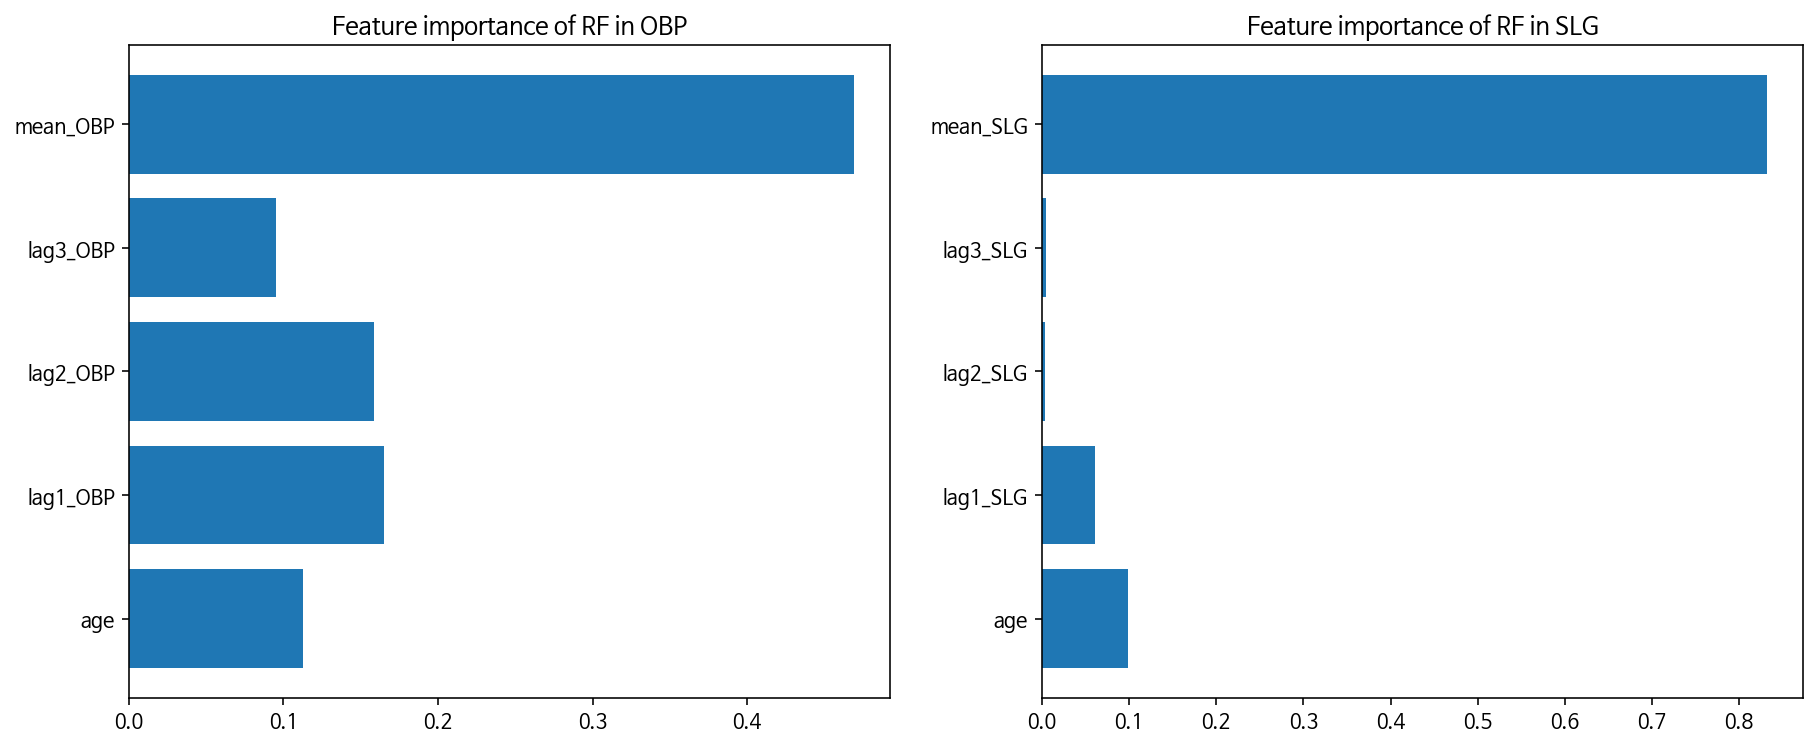

In [483]:
plt.figure(figsize=(15,6)) # 그래프의 크기 지정
plt.subplot(1,2,1) # 1행 2열의 첫번째(1,1) 그래프

#가로막대 그래프
plt.barh(OBP_train.iloc[:,-5:].columns,OBP_RF_models['RF'].feature_importances_) 

plt.title('Feature importance of RF in OBP')
plt.subplot(1,2,2) # 1행 2열의 두번째(1,2) 그래프
plt.barh(SLG_train.iloc[:,-5:].columns,SLG_RF_models['RF'].feature_importances_)
plt.title('Feature importance of RF in SLG')
plt.show()

In [485]:
# Lasso에서 GridSearchCV로 탐색한 최적의 alpha값 출력
print('Alpha : ', OBP_linear_models['Lasso'].alpha) 
# Lasso model의 선형 계수 값 출력
display(pd.DataFrame(OBP_linear_models['Lasso'].coef_.reshape(-1, 5),
                     columns=OBP_train.iloc[:,-5:].columns, index = ['coefficient']))

Alpha :  0.0001


,age,lag1_OBP,lag2_OBP,lag3_OBP,mean_OBP
coefficient,0.003195,0.018249,0.0,0.0,0.864913


In [486]:
print('Alpha : ', SLG_linear_models['Lasso'].alpha)
display(pd.DataFrame(SLG_linear_models['Lasso'].coef_.reshape(-1, 5),
                     columns=SLG_train.iloc[:,-5:].columns, index = ['coefficient']))

Alpha :  0.0001


,age,lag1_SLG,lag2_SLG,lag3_SLG,mean_SLG
coefficient,0.0049,0.081209,0.0,-0.0,0.836453


..

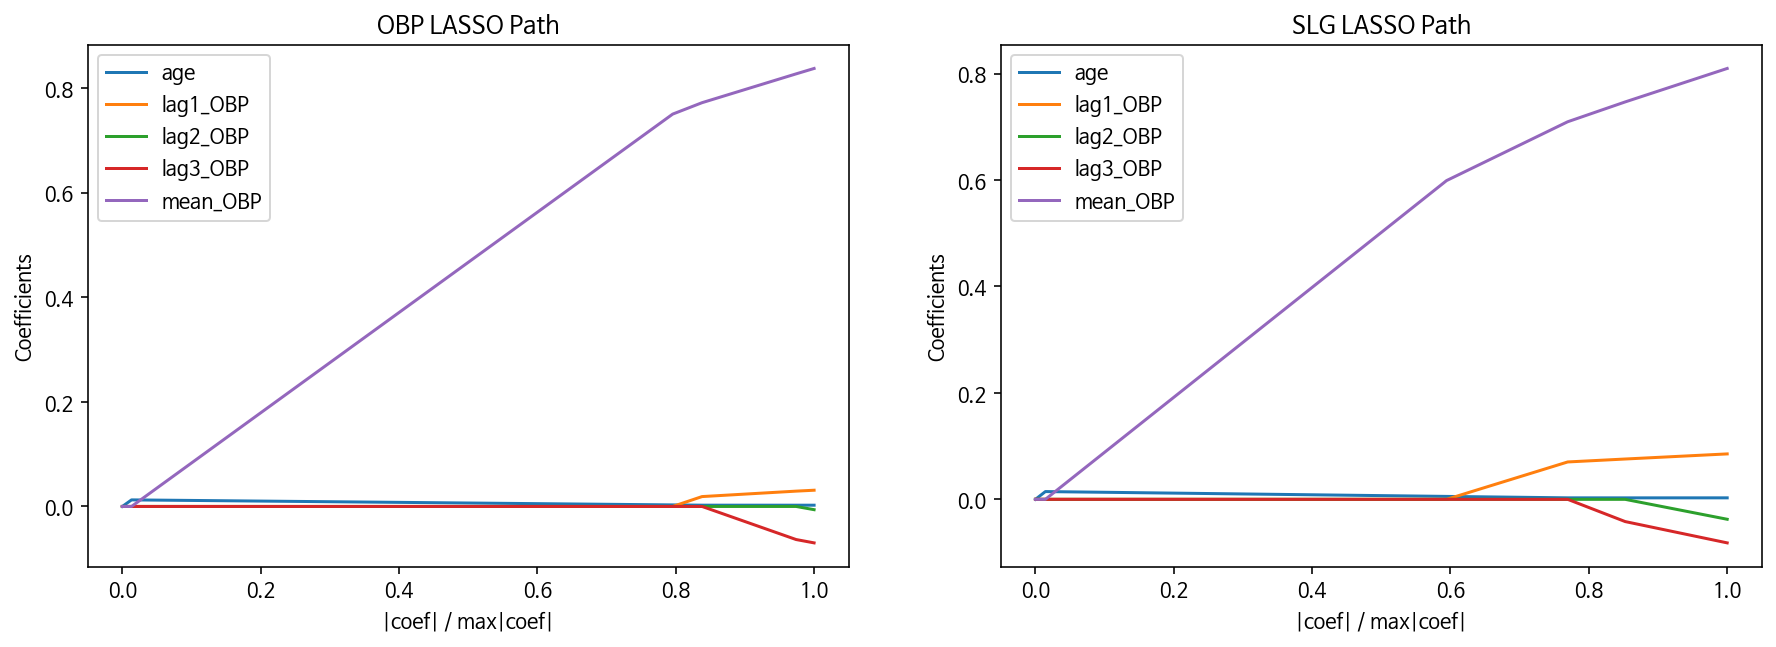

In [487]:
from sklearn.linear_model import lars_path
plt.figure(figsize=(15,4.8)) # 그래프 크기 지정
plt.subplot(1,2,1) # 1행 2열의 첫 번째(1행, 1열) 그래프 

# OBP 모델의 alpha 값의 변화에 따른 계수의 변화를 alpha, coefs에 저장한다.
alphas, _, coefs = lars_path(OBP_train.iloc[:,-5:].values, OBP_train['OBP'],
                             method='lasso', verbose=True)

# 피처별 alpha 값에 따른 선형 모델 계수의 절댓값의 합 
xx = np.sum(np.abs(coefs.T), axis=1)
# 계수의 절댓값 중 가장 큰 값으로 alpha에 따른 피처의 계수의 합을 나눈다. 
xx /= xx[-1]

plt.plot(xx, coefs.T)
plt.xlabel('|coef| / max|coef|')
plt.ylabel('Coefficients')
plt.title('OBP LASSO Path')
plt.axis('tight')
plt.legend(OBP_train.iloc[:,-5:].columns)

plt.subplot(1,2,2) # 1행 2열의 두 번째(1행, 2열) 그래프
# SLG 모델에서 alpha 값의 변화에 따른 계수의 변화를 alpha, coefs에 저장한다.
alphas, _, coefs = lars_path(SLG_train.iloc[:,-5:].values, SLG_train['SLG'],
                             method='lasso', verbose=True)
xx = np.sum(np.abs(coefs.T), axis=1)
xx /= xx[-1]

plt.plot(xx, coefs.T)
plt.xlabel('|coef| / max|coef|')
plt.ylabel('Coefficients')
plt.title('SLG LASSO Path')
plt.axis('tight')
plt.legend(OBP_train.iloc[:,-5:].columns)
plt.show()

## 1.5. 성능 향상을 위한 방법
### 1.5.1. 앙상블

In [488]:
print('OBP model averaging: ',
      wrmse(OBP_test['OBP'], OBP_test['AB'], (Lasso_OBP + RF_OBP) / 2))
print('SLG model averaging: ',
      wrmse(SLG_test['SLG'], OBP_test['AB'], (Lasso_SLG + RF_SLG) / 2))

OBP model averaging:  0.3324574652010581
SLG model averaging:  0.6684541138633258


### 1.5.2. 단순화된 모델 생성

In [532]:
# 전처리된 데이터를 다른 곳에 저장
sum_hf_yr_OBP_origin = sum_hf_yr_OBP.copy()

# 전체 희생타 계산
regular_season_df['SF'] = regular_season_df[['H','BB','HBP']].sum(axis=1) / regular_season_df['OBP'] -  regular_season_df[['AB','BB','HBP']].sum(axis=1)
regular_season_df['SF'].fillna(0, inplace = True)
regular_season_df['SF'] = regular_season_df['SF'].apply(lambda x : round(x,0))

# 한 타수당 평균 희생타 계산 후 필요한 것만 추출
regular_season_df['SF_1'] = regular_season_df['SF'] / regular_season_df['AB']
regular_season_df_SF = regular_season_df[['batter_name','year','SF_1']]

#day_by_day에서 연도별 선수의 시즌 전반기 출루율과 관련된 성적 합 구하기 + BB, RBI 추가
sum_hf_yr_OBP = day_by_day_df.loc[day_by_day_df['date'] <= 7.18].groupby(['batter_name','year'])['AB','H','BB','HBP','RBI', '2B', '3B', 'HR'].sum().reset_index()
#day_by_day와 regular season에서 구한 희생타 관련 데이터를 합치기
sum_hf_yr_OBP = sum_hf_yr_OBP.merge(regular_season_df_SF, how = 'left',
                                    on=['batter_name','year'])

# 한 타수당 평균 희생타 계산
sum_hf_yr_OBP['SF'] = (sum_hf_yr_OBP['SF_1']*sum_hf_yr_OBP['AB']).apply(lambda x: round(x,0))
sum_hf_yr_OBP.drop('SF_1',axis = 1, inplace = True)

# 전반기 OBP(출루율 계산)
sum_hf_yr_OBP['OBP'] = sum_hf_yr_OBP[['H', 'BB', 'HBP']].sum(axis = 1) /  sum_hf_yr_OBP[['AB', 'BB', 'HBP','SF']].sum(axis = 1)
sum_hf_yr_OBP['OBP'].fillna(0, inplace = True)

# TB 계산
sum_hf_yr_OBP['TB'] =  sum_hf_yr_OBP['H'] + sum_hf_yr_OBP['2B']*2 + sum_hf_yr_OBP['3B']*3 + sum_hf_yr_OBP['HR']*4
sum_hf_yr_OBP = sum_hf_yr_OBP[['batter_name','year','AB','OBP', 'BB', 'TB', 'RBI']]

# 나이 추가
sum_hf_yr_OBP = sum_hf_yr_OBP.merge(regular_season_df[['batter_name','year','age']],
                                    how = 'left', on=['batter_name','year'])

# 평균 OBP 추가
sum_hf_yr_OBP = sum_hf_yr_OBP.merge(player_OBP_mean[['batter_name', 'mean_OBP']],
                                    how ='left', on="batter_name")
sum_hf_yr_OBP = sum_hf_yr_OBP.loc[~sum_hf_yr_OBP['mean_OBP'].isna()].reset_index(drop=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


In [533]:
OBP_train

,batter_name,year,AB,OBP,BB,TB,RBI,age,mean_OBP
0,가르시아,2018,85,0.418367,6,55,17,33,0.383495
1,강경학,2011,1,0.000000,0,0,0,19,0.337880
2,강경학,2014,0,1.000000,2,0,0,22,0.337880
3,강경학,2015,156,0.342541,21,60,15,23,0.337880
4,강경학,2016,81,0.222222,6,21,4,24,0.337880
...,...,...,...,...,...,...,...,...,...
1347,황진수,2012,4,0.400000,1,3,0,23,0.358779
1348,황진수,2013,0,0.000000,0,0,0,24,0.358779
1349,황진수,2016,9,0.000000,0,0,0,27,0.358779
1350,황진수,2017,71,0.316456,5,33,8,28,0.358779


In [534]:
# 각 변수에 대한 1년 전 성적 생성
sum_hf_yr_OBP = lag_function(sum_hf_yr_OBP, "BB", 1)
sum_hf_yr_OBP = lag_function(sum_hf_yr_OBP, "TB", 1)
sum_hf_yr_OBP = lag_function(sum_hf_yr_OBP, "RBI", 1)
sum_hf_yr_OBP = lag_function(sum_hf_yr_OBP, "OBP", 1)

sum_hf_yr_OBP = sum_hf_yr_OBP.dropna() # 결측치 포함한 행 제거

# 변수 리스트 지정
feature_list_1 = ['age', 'lag1_OBP', 'mean_OBP']
feature_list_2 = ['age', 'lag1_BB', 'lag1_TB', 'lag1_RBI','lag1_OBP', 'mean_OBP']

In [535]:
# 학습시킬 데이터 30타수 이상만 학습
sum_hf_yr_OBP= sum_hf_yr_OBP.loc[sum_hf_yr_OBP['AB']>=30] 

# 2018년 test로 나누고 나머지는 학습
OBP_train = sum_hf_yr_OBP.loc[sum_hf_yr_OBP['year'] != 2018]
OBP_test = sum_hf_yr_OBP.loc[sum_hf_yr_OBP['year'] == 2018]

In [537]:
start = time.time() # 시작 시간 저장

# grid search를 이용해 학습한다.
OBP_RF_models_1 = {
    'RF': GridSearchCV(
        RandomForestRegressor(random_state=42), param_grid=RF_params, n_jobs=-1
        ).fit(OBP_train.loc[:,feature_list_1], OBP_train['OBP']).best_estimator_}

print(f"걸린시간 : {np.round(time.time() - start,3)}초") # 현재시간 – 시작시간(단위 초)

걸린시간 : 1125.614초


In [536]:
start = time.time() # 시작 시간 

OBP_RF_models_2 = {
    'RF': GridSearchCV(
        RandomForestRegressor(random_state=42), param_grid=RF_params, n_jobs=-1
        ).fit(OBP_train.loc[:,feature_list_2], OBP_train['OBP']).best_estimator_}
        
print(f"걸린시간 : {np.round(time.time() - start,3)}초") # 현재시간 – 시작시간(단위 초)

걸린시간 : 1214.817초


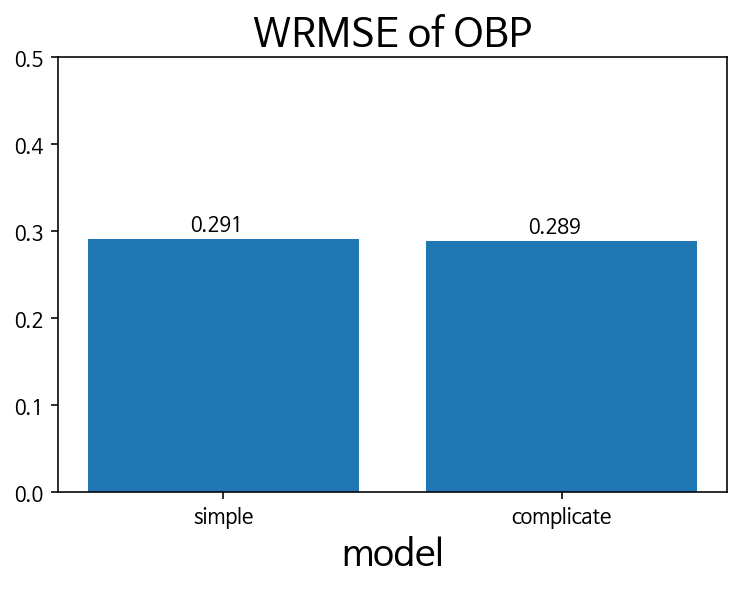

In [492]:
# 예측
RF_OBP_1 = OBP_RF_models_1['RF'].predict(OBP_test.loc[:,feature_list_1])
RF_OBP_2 = OBP_RF_models_2['RF'].predict(OBP_test.loc[:,feature_list_2])

# wrmse 계산
wrmse_score = [wrmse(OBP_test['OBP'],OBP_test['AB'],RF_OBP_1) ,
               wrmse(OBP_test['OBP'],OBP_test['AB'],RF_OBP_2)]
x_lab = ['simple', 'complicate']

plt.bar(x_lab, wrmse_score)
plt.title('WRMSE of OBP', fontsize=20)
plt.xlabel('model', fontsize=18)
plt.ylabel('', fontsize=18)
plt.ylim(0,0.5)
# 막대그래프 위에 값을 표시해준다.
for i, v in enumerate(wrmse_score):
    plt.text(i-0.1, v + 0.01, str(np.round(v,3))) # x 좌표, y좌표, 텍스트 표시
plt.show()

In [493]:
# 최종 제출을 위한 원래 데이터 복구 
sum_hf_yr_OBP = sum_hf_yr_OBP_origin.copy()

### 1.5.3. 테스트 데이터 정제

In [494]:
submission = pd.read_csv('/content/submission.csv')
submission['year'] = 2019 # 연도 기입

# 2019년의 Age(나이) 계산
batter_year_born = regular_season_df[['batter_id','batter_name','year_born']].copy()
# 중복선수 제거
batter_year_born = batter_year_born.drop_duplicates().reset_index(drop=True) 

submission = submission.merge(batter_year_born, how='left',
                              on=['batter_id', 'batter_name'])
submission['age'] = submission['year'] - submission['year_born'].apply(lambda x: int(x[:4]))
submission.head()

,batter_id,batter_name,year,year_born,age
0,1,강경학,2019,1992년 08월 11일,27
1,2,강구성,2019,1993년 06월 09일,26
2,3,강민국,2019,1992년 01월 10일,27
3,4,강민호,2019,1985년 08월 18일,34
4,5,강백호,2019,1999년 07월 29일,20


In [495]:
# submission OBP, SLG 파일 2개 만들어 합치기 
submission_OBP = submission.copy()
submission_SLG = submission.copy()

In [496]:
# 앞서 전처리한 데이터를 이용해 평균 성적 기입
submission_OBP = submission_OBP.merge(
    sum_hf_yr_OBP[['batter_name','mean_OBP']].drop_duplicates().reset_index(drop=True),
    how = 'left', on ='batter_name')

# 앞서 전처리한 데이터를 이용해 과거 성적 값 채우기
for i in [1,2,3]:
    temp_lag_df = sum_hf_yr_OBP.loc[
        (sum_hf_yr_OBP['year'] == (2019 - i)) &
        (sum_hf_yr_OBP['AB']>=30),['batter_name','OBP']].copy()
    temp_lag_df.rename(columns={'OBP':'lag'+str(i)+'_OBP'}, inplace=True)
    submission_OBP = submission_OBP.merge(temp_lag_df, how='left', on='batter_name')

submission_OBP.head()

,batter_id,batter_name,year,year_born,age,mean_OBP,lag1_OBP,lag2_OBP,lag3_OBP
0,1,강경학,2019,1992년 08월 11일,27,0.337880,0.423611,0.285714,0.222222
1,2,강구성,2019,1993년 06월 09일,26,NaN,NaN,NaN,NaN
2,3,강민국,2019,1992년 01월 10일,27,NaN,NaN,NaN,NaN
3,4,강민호,2019,1985년 08월 18일,34,0.358187,0.328990,0.386076,0.441860
4,5,강백호,2019,1999년 07월 29일,20,0.356164,0.355685,NaN,NaN


In [497]:
submission_OBP['batter_name'].loc[submission_OBP['mean_OBP'].isna()].values

array(['강구성', '강민국', '강상원', '고명성', '김응민', '김종덕', '김주찬', '김철호', '김태연',
       '김태진', '김형준', '나원탁', '남태혁', '박광열', '박기혁', '백민기', '샌즈', '신범수',
       '신성현', '양종민', '윤정우', '이동훈', '이범호', '이병휘', '이성곤', '이인행', '이종욱',
       '이진영', '이창진', '장승현', '장시윤', '전민재', '전병우', '정경운', '정성훈', '조홍석',
       '최원제', '홍창기'], dtype=object)

In [498]:
for batter_name in ["김주찬", "이범호"]:
     # 30타수 이상인 해당선수의 인덱스(Boolean)
    cond_regular = (regular_season_df['AB'] >= 30) &  (regular_season_df['batter_name'] == batter_name)
    
    # 타수를 고려해 평균 OBP 계산
    mean_OBP = sum(regular_season_df.loc[cond_regular,'AB'] * regular_season_df.loc[cond_regular,'OBP']) / sum(regular_season_df.loc[cond_regular,'AB'])
    
    submission_OBP.loc[(submission_OBP['batter_name'] == batter_name),'mean_OBP'] =  mean_OBP
    
    # regular_season_Batter으로부터 1, 2, 3년 전 성적 구하기
    cond_sub = submission_OBP['batter_name'] == batter_name
    submission_OBP.loc[cond_sub,'lag1_OBP'] = regular_season_df.loc[
        (cond_regular) & (regular_season_df['year']==2018),'OBP'].values
    submission_OBP.loc[cond_sub,'lag2_OBP'] = regular_season_df.loc[
        (cond_regular) & (regular_season_df['year']==2017),'OBP'].values
    submission_OBP.loc[cond_sub,'lag3_OBP'] = regular_season_df.loc[
        (cond_regular) & (regular_season_df['year']==2016),'OBP'].values

In [499]:
for i in np.where(submission_OBP['batter_name'].isin(["고명성","전민재","김철호","신범수","이병휘"])):
    #submission_OBP.loc[i,'mean_OBP'] = season_OBP_mean.loc[season_OBP_mean['year']==2018,'mean_OBP'].values
    submission_OBP.loc[i,'mean_OBP'] =  season_OBP_mean.loc[season_OBP_mean['year']==2018,'mean_OBP']

In [500]:
for batter_name in ["전병우","샌즈"]:
    # 30 타수 이상인 해당 선수의 index 추출
    cond_regular = (regular_season_df['AB']>=30) & \
                   (regular_season_df['batter_name']==batter_name) 

# 타수를 고려해 선수의 평균 OBP계산
mean_OBP = sum(regular_season_df.loc[cond_regular,'AB'] * regular_season_df.loc[cond_regular,'OBP']) / sum(regular_season_df.loc[cond_regular,'AB'])
    
submission_OBP.loc[(submission_OBP['batter_name'] == batter_name),'mean_OBP'] = mean_OBP

cond_sub = submission_OBP['batter_name'] == batter_name

# 2018년 데이터로부터 2019년의 1년 전 성적 기입
submission_OBP.loc[cond_sub,'lag1_OBP'] = regular_season_df.loc[
    (cond_regular)&(regular_season_df['year']==2018),'OBP'].values

In [501]:
# 평균 성적이 결측치인 선수들에 대해 평균 OBP의 하위 25% 성적 기입
submission_OBP.loc[submission_OBP['mean_OBP'].isna(),'mean_OBP'] =np.quantile(player_OBP_mean['mean_OBP'],0.25)

In [502]:
for i in [1,2,3]: 
    # i년 전 OBP 결측치 제거
    submission_OBP = lag_na_fill(submission_OBP, 'OBP', i, season_OBP_mean)
submission_OBP.head()

,batter_id,batter_name,year,year_born,age,mean_OBP,lag1_OBP,lag2_OBP,lag3_OBP
0,1,강경학,2019,1992년 08월 11일,27,0.337880,0.423611,0.285714,0.222222
1,2,강구성,2019,1993년 06월 09일,26,0.304124,0.329991,0.330297,0.336224
2,3,강민국,2019,1992년 01월 10일,27,0.304124,0.329991,0.330297,0.336224
3,4,강민호,2019,1985년 08월 18일,34,0.358187,0.328990,0.386076,0.441860
4,5,강백호,2019,1999년 07월 29일,20,0.356164,0.355685,0.356317,0.362245


In [503]:
# 앞서 전처리한 데이터로 평균 SLG 값 기입
submission_SLG = submission_SLG.merge(
    sum_hf_yr_SLG[['batter_name','mean_SLG']].drop_duplicates().reset_index(drop=True),
    how='left', on='batter_name')

# 앞서 전처리한 데이터에서 과거 SLG 값 채우기
for i in [1,2,3]:
    temp_lag_df = sum_hf_yr_SLG.loc[(sum_hf_yr_SLG['year'] == (2019 - i)) &
        (sum_hf_yr_SLG['AB']>=30),['batter_name','SLG']].copy()
    
    temp_lag_df.rename(columns={'SLG':'lag'+str(i)+'_SLG'}, inplace=True)
    
    submission_SLG = submission_SLG.merge(temp_lag_df, how='left', on='batter_name')

In [504]:
submission_SLG['batter_name'].loc[submission_SLG['mean_SLG'].isna()].values

array(['강구성', '강민국', '강상원', '고명성', '김응민', '김종덕', '김주찬', '김철호', '김태연',
       '김태진', '김형준', '나원탁', '남태혁', '박광열', '박기혁', '백민기', '샌즈', '신범수',
       '신성현', '양종민', '윤정우', '이동훈', '이범호', '이병휘', '이성곤', '이인행', '이종욱',
       '이진영', '이창진', '장승현', '장시윤', '전민재', '전병우', '정경운', '정성훈', '조홍석',
       '최원제', '홍창기'], dtype=object)

In [505]:
for batter_name in ["김주찬", "이범호"]:
     # mean_SLG 계산
    cond_regular = (regular_season_df['AB'] >= 30) & \
                   (regular_season_df['batter_name'] == batter_name)
    
    # 타수를 고려해 선수의 평균 SLG 계산
    mean_SLG = sum(regular_season_df.loc[cond_regular,'AB'] * \
                   regular_season_df.loc[cond_regular,'SLG']) / \
               sum(regular_season_df.loc[cond_regular,'AB'])
    
    submission_SLG.loc[(submission_SLG['batter_name'] == batter_name), 'mean_SLG'] = \
        mean_SLG
    
    # regular_season_Batter으로부터 1, 2, 3년 전 성적 구하기
    cond_sub = submission_SLG['batter_name'] == batter_name
    
    submission_SLG.loc[cond_sub,'lag1_SLG'] = regular_season_df.loc[
        (cond_regular) & (regular_season_df['year'] == 2018),'SLG'].values
    submission_SLG.loc[cond_sub,'lag2_SLG'] = regular_season_df.loc[
        (cond_regular) & (regular_season_df['year'] == 2017),'SLG'].values
    submission_SLG.loc[cond_sub,'lag3_SLG'] = regular_season_df.loc[
        (cond_regular) & (regular_season_df['year'] == 2016),'SLG'].values

In [506]:
for i in np.where(submission_SLG['batter_name'].isin(
    ["고명성","전민재","김철호","신범수","이병휘"])):
     # 위의 해당 선수들의 평균 SLG 평균값으로 대체
    #submission_SLG.loc[i,'mean_SLG'] = season_SLG_mean.loc[season_SLG_mean['year']==2018,'mean_SLG'].values
    submission_SLG.loc[i,'mean_SLG'] = \
        season_SLG_mean.loc[season_SLG_mean['year']==2018,'mean_SLG']

In [507]:
for batter_name in ["전병우","샌즈"]:
    
# 30타수 이상인 해당선수의 인덱스(Boolean) 
cond_regular = (regular_season_df['AB']>=30)&(regular_season_df['batter_name']==batter_name)

# 타수를 고려한 평균 SLG 계산
mean_SLG = sum(regular_season_df.loc[cond_regular,'AB']*
regular_season_df.loc[cond_regular,'SLG']) / sum(regular_season_df.loc[cond_regular,'AB'])

# 해당 선수의 평균 SLG 값 기입
submission_SLG.loc[(submission_SLG['batter_name'] == batter_name),'mean_SLG'] = mean_SLG

# 해당 선수의 1년 전 SLG값 기입
cond_sub = submission_SLG['batter_name'] == batter_name
submission_SLG.loc[cond_sub,'lag1_SLG'] = regular_season_df.loc[(cond_regular)&
(regular_season_df['year']==2018),'SLG'].values

In [508]:
# 평균 성적이 결측치인 선수들에 대해 평균 SLG의 하위 25% 성적 기입
submission_SLG.loc[submission_SLG['mean_SLG'].isna(),'mean_SLG'] = np.quantile(player_SLG_mean['mean_SLG'],0.25)

In [509]:
for i in [1,2,3]:
    # i년 전 SLG 성적 결측치 처리
    submission_SLG = lag_na_fill(submission_SLG, 'SLG', i, season_SLG_mean)
submission_SLG.head()

,batter_id,batter_name,year,year_born,age,mean_SLG,lag1_SLG,lag2_SLG,lag3_SLG
0,1,강경학,2019,1992년 08월 11일,27,0.332527,0.523810,0.256098,0.222222
1,2,강구성,2019,1993년 06월 09일,26,0.326923,0.391429,0.385754,0.385397
2,3,강민국,2019,1992년 01월 10일,27,0.326923,0.391429,0.385754,0.385397
3,4,강민호,2019,1985년 08월 18일,34,0.466540,0.487273,0.548736,0.577689
4,5,강백호,2019,1999년 07월 29일,20,0.523719,0.532051,0.484152,0.483795


In [510]:
# Random Forests를 이용해 OBP 예측
predict_OBP = OBP_RF_models['RF'].predict(submission_OBP.iloc[:,-5:]) 
# Lasso를 이용해 SLG 예측
predict_SLG = SLG_linear_models ['Lasso'].predict(submission_SLG.iloc[:,-5:])

In [511]:
final_submission = submission[['batter_id','batter_name']]
final_submission['OPS'] = predict_SLG + predict_OBP # OBP + SLG = OPS 
final_submission.head(10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,batter_id,batter_name,OPS
0,1,강경학,0.503957
1,2,강구성,0.687933
2,3,강민국,0.696609
3,4,강민호,0.958395
4,5,강백호,0.751592
5,8,강상원,0.661807
6,9,강승호,0.505642
7,11,강진성,0.656007
8,12,강한울,0.672859
9,16,고명성,0.640507


### 1.5.4. 반발계수의 변화

In [512]:
# 시즌별 전체 OBP 계산(30타수 이상인 선수들의 기록만 이용)
season_OBP = \
    regular_season_df.loc[regular_season_df['AB'] >= 30].groupby('year').agg(
        {'AB':'sum', 'H':'sum', 'BB':'sum', 'HBP':'sum', 'SF':'sum'}).reset_index()

season_OBP['OBP'] = season_OBP[['H','BB','HBP']].sum(axis=1) / \
                    season_OBP[['AB','BB','HBP','SF']].sum(axis=1)

# 시즌별 전체 SLG 계산(30타수 이상인 선수들의 기록만 이용)
season_SLG = \
    regular_season_df.loc[regular_season_df['AB']>=30].groupby('year').agg(
        {'AB':'sum', 'H':'sum', '2B':'sum', '3B':'sum', 'HR':'sum'}).reset_index()

season_SLG['SLG'] = ((season_SLG['H'] - season_SLG[['2B','3B','HR']].sum(axis=1)) + \
                     season_SLG['2B']*2+season_SLG['3B']*3+ season_SLG['HR']*4) / \
                    season_SLG['AB']

# season_OBP와 season_SLG를 병합 후 season_OPS를 생성해 OPS 계산
season_OPS = pd.merge(season_OBP[['year','OBP']],season_SLG[['year', 'SLG']], on = 'year')
season_OPS['OPS'] = season_OPS['OBP'] + season_OPS['SLG']

# 시즌별 전체 홈런 수와 한 선수당 평균 홈런 수 계산
season_HR = regular_season_df.loc[regular_season_df['AB']>=30].groupby('year').agg(
    {'HR':['sum','mean','count']}).reset_index()
season_HR.columns = ['year', 'sum_HR', 'mean_HR', 'count']

# 기존의 OPS 데이터셋과 병합
season_OPS = season_OPS.merge(season_HR,on ='year' ,how='left')
display(season_OPS.tail())

,year,OBP,SLG,OPS,sum_HR,mean_HR,count
21,2014,0.368970,0.446302,0.815272,1013,7.235714,140
22,2015,0.362742,0.434129,0.796871,1222,7.685535,159
23,2016,0.368325,0.443871,0.812196,1267,7.918750,160
24,2017,0.356469,0.444584,0.801053,1450,8.285714,175
25,2018,0.355858,0.455936,0.811794,1726,9.806818,176


In [513]:
#2018년의 평균 홈런 개수를 시즌별 평균 홈런 수에서 뺀다(HR_diff)
season_OPS['HR_diff'] = season_OPS['mean_HR'] - season_OPS['mean_HR'].iloc[-1]
difference = season_OPS.sort_values(by = 'HR_diff')[['year','OPS','HR_diff']]
display(difference.reset_index(drop=True).head(12))

,year,OPS,HR_diff
0,2012,0.703301,-5.799242
1,2013,0.748820,-4.891325
2,2006,0.709301,-4.806818
3,2008,0.741542,-4.671987
4,2011,0.735087,-4.564883
5,2007,0.730715,-4.451555
6,2005,0.740615,-3.543660
7,2010,0.770265,-2.623332
8,2014,0.815272,-2.571104
9,2004,0.751737,-2.500696


In [514]:
# 2000년도 이전의 데이터 수가 충분치 않아 고려하지 않는다.
season_OPS.loc[season_OPS['year']>2000]

,year,OBP,SLG,OPS,sum_HR,mean_HR,count,HR_diff
8,2001,0.366585,0.454593,0.821178,199,7.653846,26,-2.152972
9,2002,0.343798,0.424739,0.768536,274,8.838710,31,-0.968109
10,2003,0.353936,0.427291,0.781227,301,7.717949,39,-2.088869
11,2004,0.344181,0.407556,0.751737,358,7.306122,49,-2.500696
12,2005,0.344851,0.395764,0.740615,357,6.263158,57,-3.543660
13,2006,0.334390,0.374912,0.709301,345,5.000000,69,-4.806818
14,2007,0.346222,0.384493,0.730715,407,5.355263,76,-4.451555
15,2008,0.350637,0.390905,0.741542,457,5.134831,89,-4.671987
16,2009,0.359326,0.429237,0.788563,806,8.141414,99,-1.665404
17,2010,0.356988,0.413278,0.770265,783,7.183486,109,-2.623332


In [515]:
final_submission['OPS'] = final_submission['OPS'] - 0.038
display(final_submission.head(10))
final_submission.to_csv('submission.csv', index=False) # 최종 제출파일 생성

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,batter_id,batter_name,OPS
0,1,강경학,0.465957
1,2,강구성,0.649933
2,3,강민국,0.658609
3,4,강민호,0.920395
4,5,강백호,0.713592
5,8,강상원,0.623807
6,9,강승호,0.467642
7,11,강진성,0.618007
8,12,강한울,0.634859
9,16,고명성,0.602507
